<a href="https://colab.research.google.com/github/RodrigoEduard/Codigos-TFM-VIU-2023/blob/Mapas_de_Chile_TFM_VIU_2013/Copia_de_TFM_VIU_2023_31_MapasZonas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DISTRIBUCIÓN DE LAS ZONAS 2.0 -----
# ZONA 1 (NORTE): XV, I, II, III, IV: 24 comunas
#   DE ARICA Y PARINACOTA(1), DE TARAPACA(3), DE ANTOFAGASTA(6), DE ATACAMA(6), DE COQUIMBO(8)

# ZONA 2: V, RM (CENTRO-METROPOLITANA): 24 comunas
#   DE VALPARAISO(16), METROPOLITANA DE SANTIAGO(8))

# ZONA 3: VI, VII, XVI, VIII (CENTRO): 47 comunas
#   DEL LIBERTADOR B. O'HIGGINS(10), DEL MAULE(11), DE ÑUBLE(6), DEL BIOBIO(20)

# ZONA 4: IX, XIV, X (SUR): 35 comunas
#   DE LA ARAUCANIA(15), DE LOS RIOS(7), DE LOS LAGOS(13)

# ZONA 5 (AUSTRAL): XI y XII: 9
#   DE AISEN DEL GRAL. C. IBAÑEZ DEL CAMPO(5), DE MAGALLANES Y DE LA ANTARTICA CHILENA(4)

In [ ]:
install.packages("googledrive")
library(googledrive)
drive_auth(use_oob = TRUE)

In [ ]:
install.packages("chilemapas")
install.packages("ggrepel")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘geometries’, ‘rapidjsonr’, ‘sfheaders’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’, ‘geojsonsf’, ‘jsonify’, ‘sp’, ‘V8’, ‘sf’, ‘rmapshaper’




In [ ]:
library(chilemapas)
library(ggplot2)
library(dplyr)
library(sf)
library(ggrepel)

In [ ]:
# Archivos usando el enlace compartido
archivo_conduccion <- drive_get("https://docs.google.com/spreadsheets/d/1ZYmSsR5HvTFF4KMSzdyRDSKPS3_7oUcX/edit?usp=sharing&ouid=100028925563193391093&rtpof=true&sd=true")

# Descargando el archivo al entorno de Colab
drive_download(archivo_conduccion, path = "conduccion_110823_15_22.xlsx", overwrite = TRUE)

# Leyendo los archivos descargados
library(readxl)
conduccion <- read_excel("conduccion_110823_15_22.xlsx")

File downloaded:

• conduccion_110823_15_22.xlsx <id: 1ZYmSsR5HvTFF4KMSzdyRDSKPS3_7oUcX>

Saved locally as:

• conduccion_110823_15_22.xlsx



In [ ]:
data(mapa_comunas)
mapa_comunas <- as.data.frame(mapa_comunas)
mapa_comunas <- select(mapa_comunas, -c("codigo_provincia"))
mapa_comunas <- select(mapa_comunas, -c("codigo_region"))

mapa_unido <- merge(mapa_comunas, codigos_territoriales, by = "codigo_comuna")

# Pasa todos los registros a MAYÚSCULA, sin tildes y mantiene la virgulilla de la ñ
old_chars <- "áéíóúÁÉÍÓÚ"
new_chars <- "aeiouAEIOU"
colum <- c("nombre_comuna" )
# AplicaNdo chartr()
mapa_unido[colum] <- lapply(mapa_unido[colum], function(x) if(is.character(x)) chartr(old_chars, new_chars, toupper(x)) else x)


table_year <- table(conduccion$`NOMBRE COMUNA`, conduccion$`AÑO INGRESO`)
table_year <- as.data.frame(table_year)

result <- aggregate(Freq ~ Var1, data = table_year, sum)

result <- rename(result,"nombre_comuna" = "Var1")
mapa_unido_frec <- merge(mapa_unido, result, by = "nombre_comuna", all = TRUE)
mapa_sf <- st_as_sf(mapa_unido_frec)

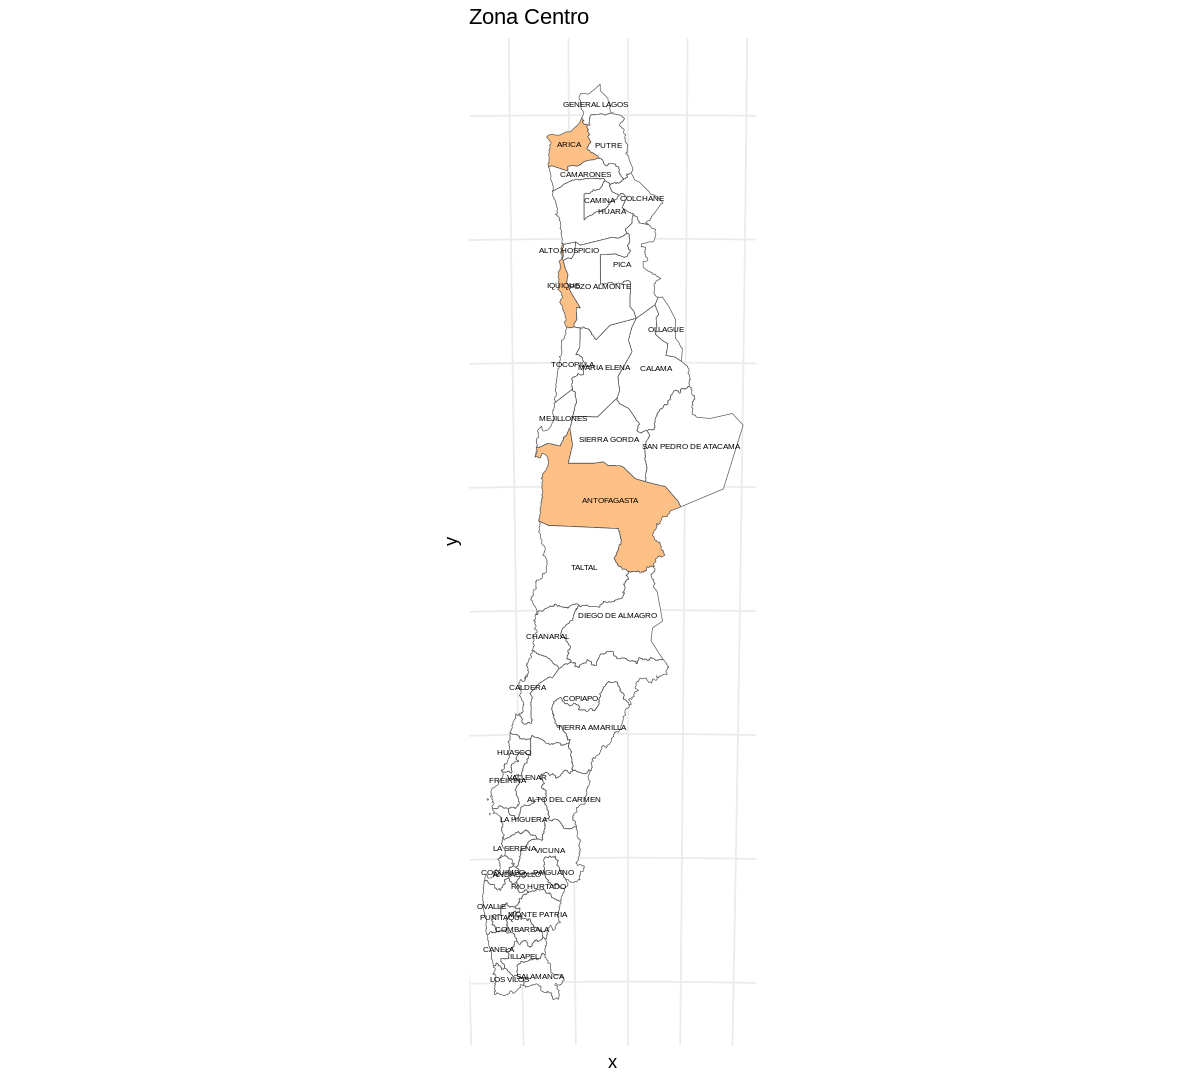

In [ ]:
#"#FFA500"
# 01 - ZONA NORTE
mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("15", "01", "02", "03", "04"))

# Proyectar
mapa_sf4_proj <- st_transform(mapa_sf4, crs = 5361)

# mapa_sf4_proj$color_comuna <- ifelse(mapa_sf4_proj$nombre_comuna %in% c(
#             "ALTO HOSPICIO","ANDACOLLO","ANTOFAGASTA","ARICA","CALAMA","CALDERA","CHAÑARAL","COMBARBALA","COPIAPO","COQUIMBO",
#             "DIEGO ALMAGRO", "FREIRINA", "ILLAPEL", "IQUIQUE", "LA SERENA", "LOS VILOS", "MARIA ELENA", "MEJILLONES","OVALLE",
#             "POZO ALMONTE","TALTAL","TOCOPILLA","VALLENAR","VICUÑA"
#             ),
# "Comuna con juzgado" , "Comuna sin juzgado" )

mapa_sf4_proj$color_comuna <- ifelse(mapa_sf4_proj$nombre_comuna %in% c(
            "ANTOFAGASTA","ARICA","IQUIQUE"            ),
"Comuna con juzgado" , "Comuna sin juzgado" )

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_comuna)) +
  geom_sf_text(aes(label = nombre_comuna), nudge_y = 0, nudge_x = 0, size = 1.7) +
  theme_minimal() +
  labs(title = "Zona Centro") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank()
  ) +
#  scale_fill_manual(name="",values = c("Comuna con juzgado" = "#A8D5BA", "Comuna sin juzgado" = "#FFC085"))
  scale_fill_manual(name="",values = c("Comuna con juzgado" = "#FFC085", "Comuna sin juzgado" = "white")) +
    guides(fill="none")




Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


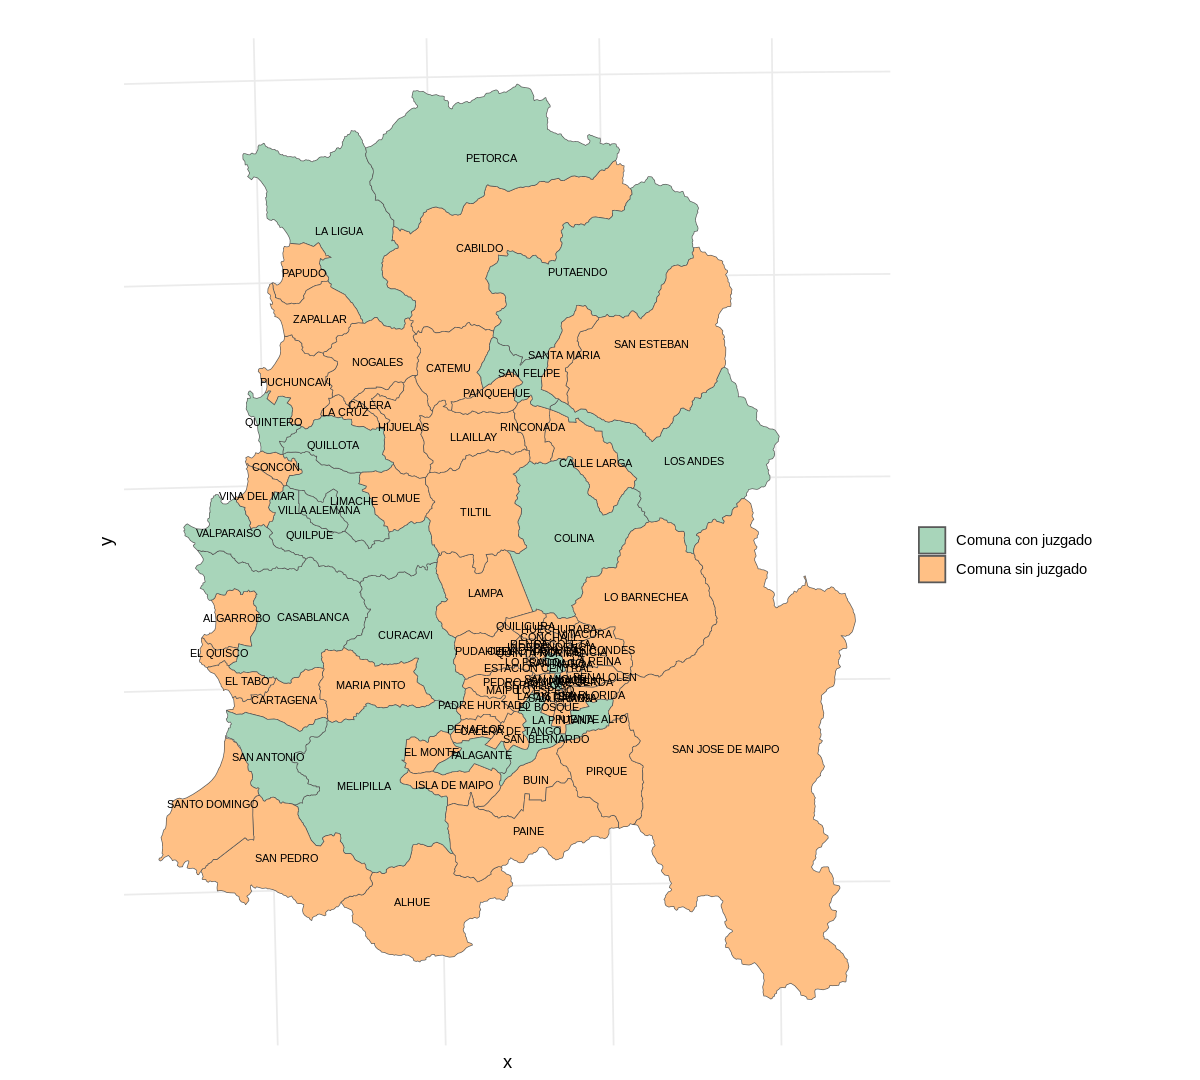

In [ ]:
# 02 - ZONA CENTRO-METROPOLITANA
bb <- st_bbox(c(xmin = -72, xmax = -69, ymin = -35, ymax = -31), crs = st_crs(mapa_sf))

mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("05","13"))

mapa_sf4_cropped <- st_crop(mapa_sf4, bb)

# Proyectar
mapa_sf4_proj <- st_transform(mapa_sf4_cropped, crs = 5361)

mapa_sf4_proj$color_comuna <- ifelse(mapa_sf4_proj$nombre_comuna %in% c(
            "CASABLANCA", "COLINA", "CURACAVI", "ISLA PASCUA", "LA CALERA", "LA LIGUA", "LIMACHE", "LOS ANDES", "MELIPILLA",
            "PETORCA","PUENTE ALTO", "PUTAENDO", "QUILLOTA", "QUILPUE", "QUINTERO", "SAN ANTONIO", "SAN BERNARDO", "SAN FELIPE",
            "SAN MIGUEL","SANTIAGO", "TALAGANTE", "VALPARAISO", "VILLA ALEMANA", "VIÑA DEL MAR"
            ),
"Comuna con juzgado" , "Comuna sin juzgado" )

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_comuna)) +
  geom_sf_text(aes(label = nombre_comuna), nudge_y = 0, nudge_x = 0, size = 2.3) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank()
  ) +
  scale_fill_manual(name="",values = c("Comuna con juzgado" = "#A8D5BA", "Comuna sin juzgado" = "#FFC085"))


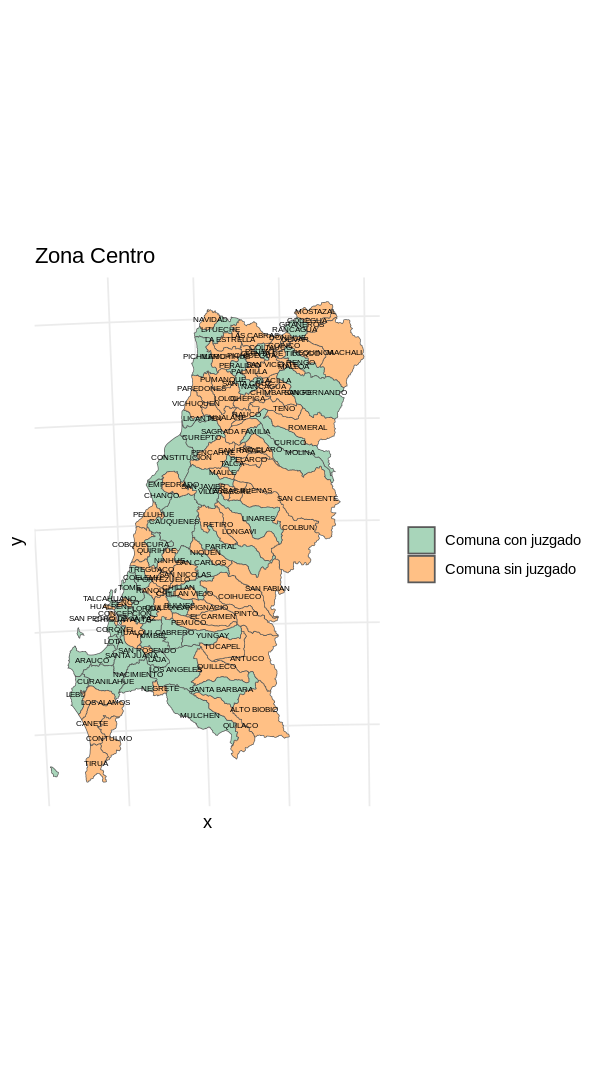

In [ ]:
# ZONA 3: VI, VII, XVI, VIII (CENTRO): 47 comunas
#   DEL LIBERTADOR B. O'HIGGINS(10), DEL MAULE(11), DE ÑUBLE(6), DEL BIOBIO(20)
mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("06", "07", "16", "08"))

# Proyectar
mapa_sf4_proj <- st_transform(mapa_sf4, crs = 5361)

mapa_sf4_proj$color_comuna <- ifelse(mapa_sf4_proj$nombre_comuna %in% c(
            "ARAUCO", "BULNES", "CABRERO", "CAÑETE", "CAUQUENES", "CHANCO", "CHIGUAYANTE", "CHILLAN", "COELEMU",
            "CONCEPCION", "CONSTITUCION", "CORONEL", "CURANILAHUE", "CUREPTO", "CURICO", "FLORIDA", "GRANEROS",
            "LAJA", "LEBU", "LICANTEN", "LINARES", "LITUECHE", "LOS ANGELES", "LOTA", "MOLINA", "MULCHEN", "NACIMIENTO",
            "PARRAL", "PERALILLO", "PEUMO", "PICHILEMU", "QUIRIHUE", "RANCAGUA", "RENGO", "SAN CARLOS", "SAN FERNANDO",
            "SAN JAVIER", "SAN PEDRO LA PAZ", "SAN VICENTE TAGUA-TAGUA", "SANTA BARBARA", "SANTA CRUZ","SANTA JUANA",
            "TALCA", "TALCAHUANO", "TOME", "YUMBEL", "YUNGAY"
            ),
"Comuna con juzgado" , "Comuna sin juzgado" )

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_comuna)) +
  geom_sf_text(aes(label = nombre_comuna), nudge_y = 0, nudge_x = 0, size = 1.7) +
  theme_minimal() +
  labs(title = "Zona Centro") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank()
  ) +
  scale_fill_manual(name="",values = c("Comuna con juzgado" = "#A8D5BA", "Comuna sin juzgado" = "#FFC085"))

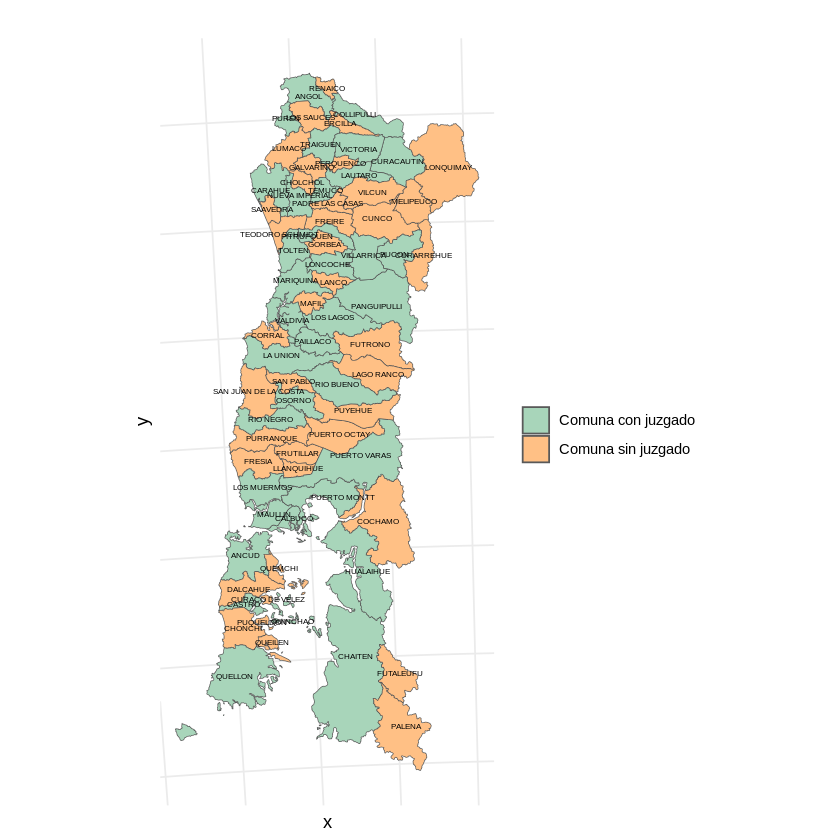

In [ ]:
# ZONA 4: IX, XIV, X (SUR): 35 comunas
#   DE LA ARAUCANIA(15), DE LOS RIOS(7), DE LOS LAGOS(13)
mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("09", "14", "10"))

# Proyectar
mapa_sf4_proj <- st_transform(mapa_sf4, crs = 5361)

mapa_sf4_proj$color_comuna <- ifelse(mapa_sf4_proj$nombre_comuna %in% c(
            "ANCUD", "ANGOL", "CALBUCO", "CARAHUE", "CASTRO", "CHAITEN", "COLLIPULLI", "CURACAUTIN", "HUALAIHUE", "LA UNION", "LAUTARO",
            "LONCOCHE", "LOS LAGOS", "LOS MUERMOS", "MARIQUINA", "MAULLIN", "NUEVA IMPERIAL", "OSORNO", "PAILLACO", "PANGUIPULLI",
            "PITRUFQUEN", "PUCON", "PUERTO MONTT", "PUERTO VARAS", "PUREN", "QUELLON", "QUINCHAO", "RIO BUENO", "RIO NEGRO",
            "TEMUCO", "TOLTEN", "TRAIGUEN", "VALDIVIA", "VICTORIA", "VILLARRICA"
            ),
"Comuna con juzgado" , "Comuna sin juzgado" )

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_comuna)) +
  geom_sf_text(aes(label = nombre_comuna), nudge_y = 0, nudge_x = 0, size = 1.7) +
  theme_minimal() +
  labs(title = " ") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank()
  ) +
  scale_fill_manual(name="",values = c("Comuna con juzgado" = "#A8D5BA", "Comuna sin juzgado" = "#FFC085"))

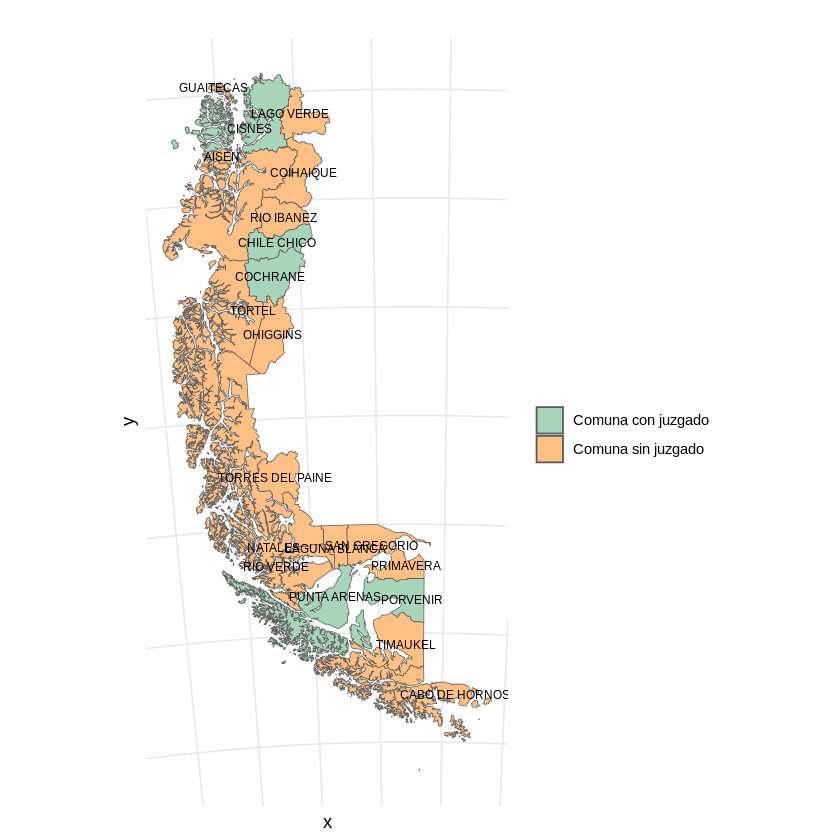

In [ ]:
# ZONA 5 (AUSTRAL): XI y XII: 9
#   DE AISEN DEL GRAL. C. IBAÑEZ DEL CAMPO(5), DE MAGALLANES Y DE LA ANTARTICA CHILENA(4)
mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("11", "12"))

# Proyectar
mapa_sf4_proj <- st_transform(mapa_sf4, crs = 5361)

mapa_sf4_proj$color_comuna <- ifelse(mapa_sf4_proj$nombre_comuna %in% c(
            "CABO HORNOS","CHILE CHICO","CISNES","COCHRANE","COYHAIQUE",
            "PORVENIR", "PUERTO AYSEN", "PUERTO NATALES","PUNTA ARENAS"
            ),
"Comuna con juzgado" , "Comuna sin juzgado" )

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_comuna)) +
  geom_sf_text(aes(label = nombre_comuna), nudge_y = 0, nudge_x = 0, size = 2.5) +
  theme_minimal() +
  labs(title = " ") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank()
  ) +
  scale_fill_manual(name="",values = c("Comuna con juzgado" = "#A8D5BA", "Comuna sin juzgado" = "#FFC085"))

In [ ]:
install.packages("ggrepel")
library(ggrepel)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



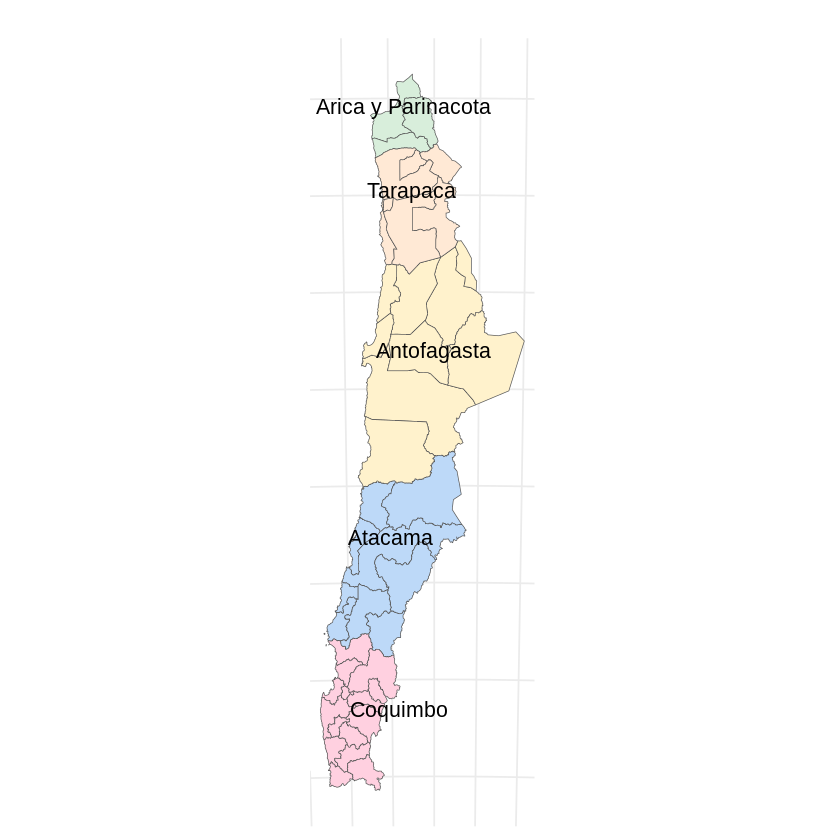

In [ ]:
# 01 - ZONA NORTE  ****************************

mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("15", "01", "02", "03", "04"))

mapa_sf4_region <- mapa_sf4_proj %>%
  group_by(nombre_region, color_region) %>%
  summarize(.groups = "drop")

mapa_sf4_region$centroide <- st_centroid(mapa_sf4_region$geometry)
mapa_sf4_region$x <- st_coordinates(mapa_sf4_region$centroide)[, 1]
mapa_sf4_region$y <- st_coordinates(mapa_sf4_region$centroide)[, 2]

mapa_sf4_proj <- st_transform(mapa_sf4, crs = 5361)

mapa_sf4_proj$color_region <- factor(mapa_sf4_proj$codigo_region,
                                     levels = c("15", "01", "02", "03", "04"))


ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_region)) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  ) +
  scale_fill_manual(name="",
                    values = c("15" = "#D8EEDB", "01" = "#FFE9D5", "02" = "#FFF2CC", "03" = "#BDD9F8", "04" = "#FFD0E0"),
                    labels = mapa_sf4$nombre_region) +
  geom_text_repel(aes(x = x, y = y, label = nombre_region), size = 4.5, color = "black", nudge_x = -0.5, data = mapa_sf4_region) +
  guides(fill="none")

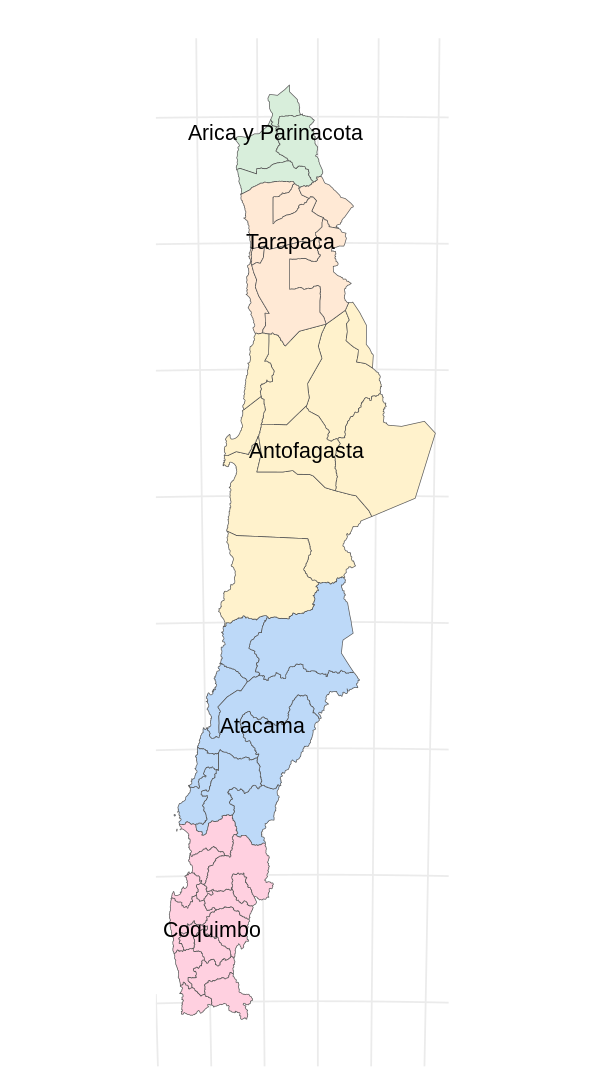

In [ ]:
# 01 - ZONA NORTE  ****************************

mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("15", "01", "02", "03", "04"))

mapa_sf4_region <- mapa_sf4_proj %>%
  group_by(nombre_region, color_region) %>%
  summarize(.groups = "drop")

mapa_sf4_region$centroide <- st_centroid(mapa_sf4_region$geometry)
mapa_sf4_region$x <- st_coordinates(mapa_sf4_region$centroide)[, 1]
mapa_sf4_region$y <- st_coordinates(mapa_sf4_region$centroide)[, 2]

mapa_sf4_proj <- st_transform(mapa_sf4, crs = 5361)

mapa_sf4_proj$color_region <- factor(mapa_sf4_proj$codigo_region,
                                     levels = c("15", "01", "02", "03", "04"))


ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_region)) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  ) +
  scale_fill_manual(name="",
                    values = c("15" = "#D8EEDB", "01" = "#FFE9D5", "02" = "#FFF2CC", "03" = "#BDD9F8", "04" = "#FFD0E0"),
                    labels = mapa_sf4$nombre_region) +
  geom_text_repel(aes(x = x, y = y, label = nombre_region), size = 4.5, color = "black", nudge_x = -0.5, data = mapa_sf4_region) +
  guides(fill="none")

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


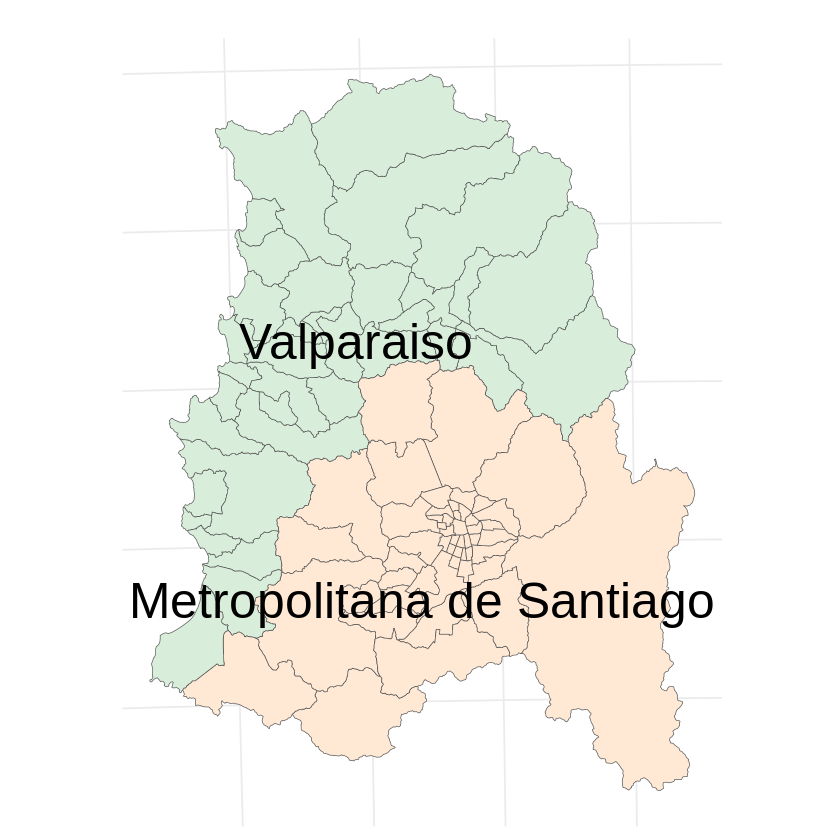

In [ ]:
#Zona 2
bb <- st_bbox(c(xmin = -72, xmax = -69, ymin = -35, ymax = -31), crs = st_crs(mapa_sf))


mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("05", "13"))


mapa_sf4_cropped <- st_crop(mapa_sf4, bb)
mapa_sf4_proj <- st_transform(mapa_sf4_cropped, crs = 5361)


mapa_sf4_proj$color_region <- factor(mapa_sf4_proj$codigo_region,
                                     levels = c("05", "13"))

mapa_sf4_region <- mapa_sf4_proj %>%
  group_by(nombre_region, color_region) %>%
  summarize(.groups = "drop")

mapa_sf4_region$centroide <- st_centroid(mapa_sf4_region$geometry)
mapa_sf4_region$x <- st_coordinates(mapa_sf4_region$centroide)[, 1]
mapa_sf4_region$y <- st_coordinates(mapa_sf4_region$centroide)[, 2]

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_region)) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  ) +
  scale_fill_manual(name="",
                    values = c("05" = "#D8EEDB", "13" = "#FFE9D5"),
                    labels = mapa_sf4$nombre_region) +
  geom_text_repel(aes(x = x, y = y, label = nombre_region), size = 10.5, color = "black", nudge_x = -0.5, data = mapa_sf4_region) +
  guides(fill="none")

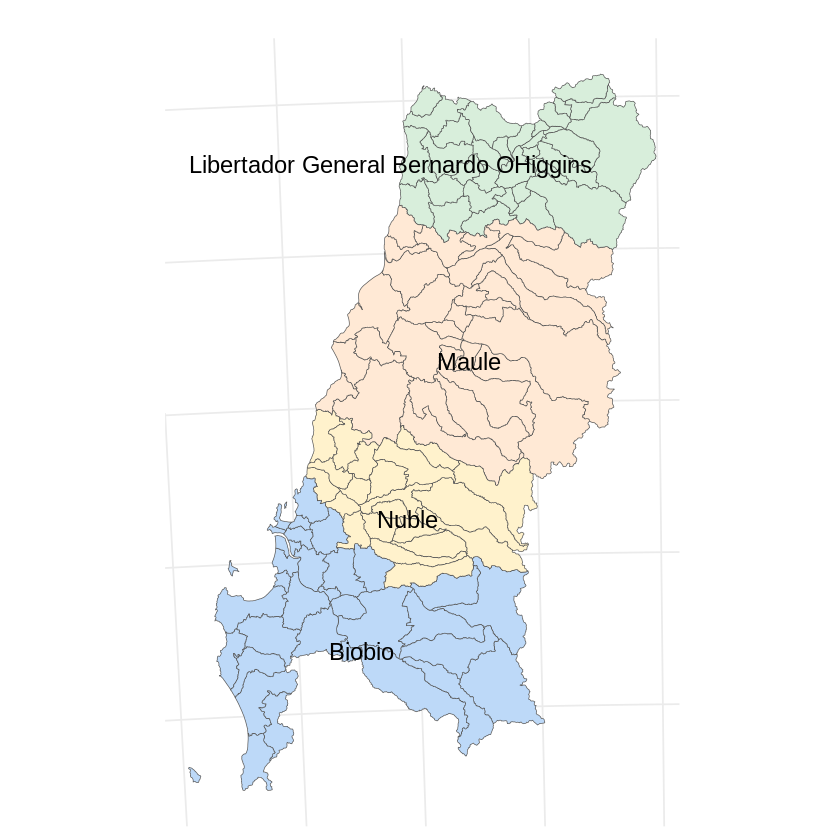

In [ ]:
# 03 - ZONA CENTRAL  *************************
  mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("06", "07", "16", "08"))

mapa_sf4_proj <- st_transform(mapa_sf4, crs = 5361)

mapa_sf4_proj$color_region <- factor(mapa_sf4_proj$codigo_region,
                                     levels = c("06", "07", "16", "08"))

mapa_sf4_region <- mapa_sf4_proj %>%
  group_by(nombre_region, color_region) %>%
  summarize(.groups = "drop")

mapa_sf4_region$centroide <- st_centroid(mapa_sf4_region$geometry)
mapa_sf4_region$x <- st_coordinates(mapa_sf4_region$centroide)[, 1]
mapa_sf4_region$y <- st_coordinates(mapa_sf4_region$centroide)[, 2]



ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_region)) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  ) +
  scale_fill_manual(name="",
                    values = c("06" = "#D8EEDB", "07" = "#FFE9D5", "16" = "#FFF2CC", "08" = "#BDD9F8"),
                    labels = mapa_sf4$nombre_region) +
  geom_text_repel(aes(x = x, y = y, label = nombre_region), size = 5, color = "black", nudge_x = -0.5, data = mapa_sf4_region) +
  guides(fill="none")+


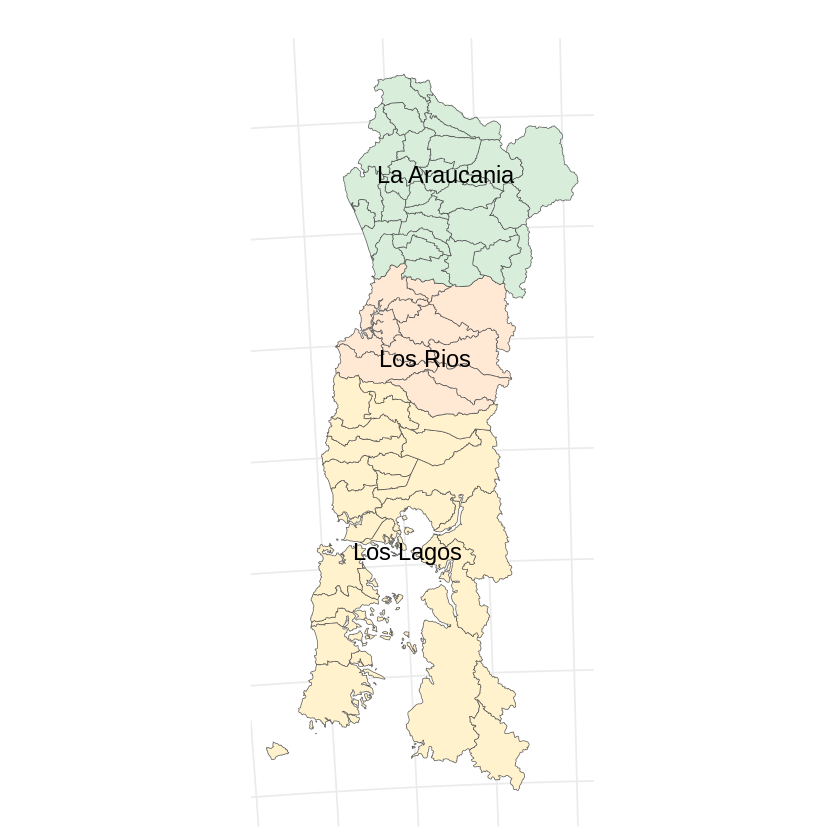

In [ ]:
#Zona 4. Sur
mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("09", "14", "10"))

mapa_sf4_proj <- st_transform(mapa_sf4, crs = 5361)

mapa_sf4_proj$color_region <- factor(mapa_sf4_proj$codigo_region,
                                     levels = c("09", "14", "10"))

mapa_sf4_region <- mapa_sf4_proj %>%
  group_by(nombre_region, color_region) %>%
  summarize(.groups = "drop")

mapa_sf4_region$centroide <- st_centroid(mapa_sf4_region$geometry)
mapa_sf4_region$x <- st_coordinates(mapa_sf4_region$centroide)[, 1]
mapa_sf4_region$y <- st_coordinates(mapa_sf4_region$centroide)[, 2]

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_region)) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  ) +
  scale_fill_manual(name="",
                    values = c("09" = "#D8EEDB", "14" = "#FFE9D5", "10" = "#FFF2CC"),
                    labels = mapa_sf4$nombre_region) +
  geom_text_repel(aes(x = x, y = y, label = nombre_region), size = 5, color = "black", nudge_x = -0.5, data = mapa_sf4_region) +
  guides(fill="none")



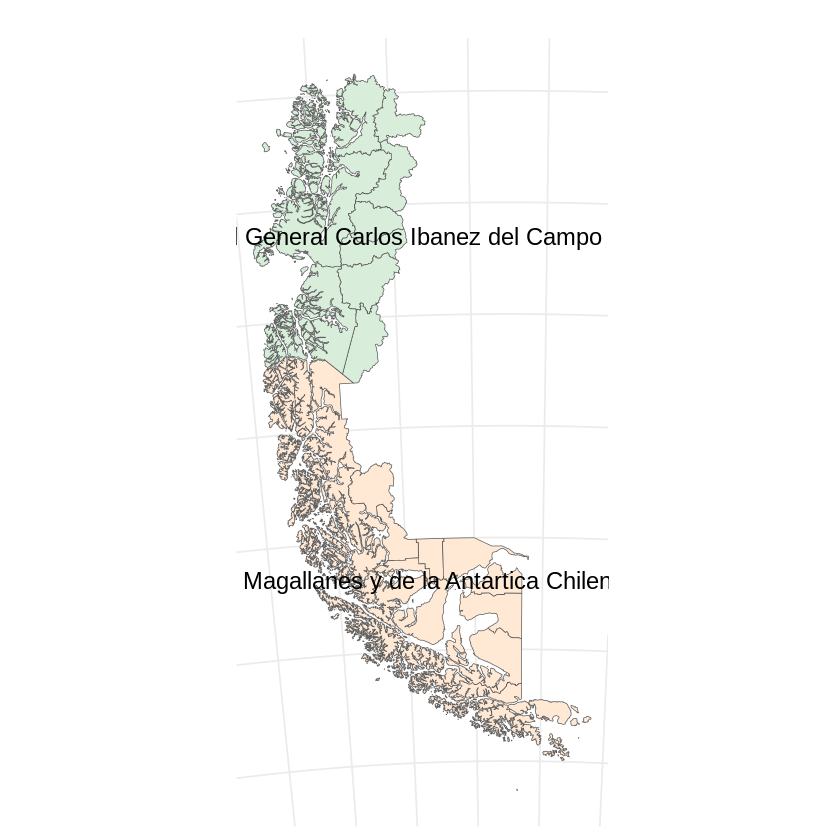

In [ ]:
#Zona 5. Austral
mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("11", "12"))

mapa_sf4_proj <- st_transform(mapa_sf4, crs = 5361)

mapa_sf4_proj$color_region <- factor(mapa_sf4_proj$codigo_region,
                                     levels = c("11", "12"))

mapa_sf4_region <- mapa_sf4_proj %>%
  group_by(nombre_region, color_region) %>%
  summarize(.groups = "drop")

mapa_sf4_region$centroide <- st_centroid(mapa_sf4_region$geometry)
mapa_sf4_region$x <- st_coordinates(mapa_sf4_region$centroide)[, 1]
mapa_sf4_region$y <- st_coordinates(mapa_sf4_region$centroide)[, 2]

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_region)) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  ) +
  scale_fill_manual(name="",
                    values = c("11" = "#D8EEDB", "12" = "#FFE9D5"),
                    labels = mapa_sf4$nombre_region) +
  geom_text_repel(aes(x = x, y = y, label = nombre_region), size = 5, color = "black", nudge_x = -0.5, data = mapa_sf4_region) +
  guides(fill="none")

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


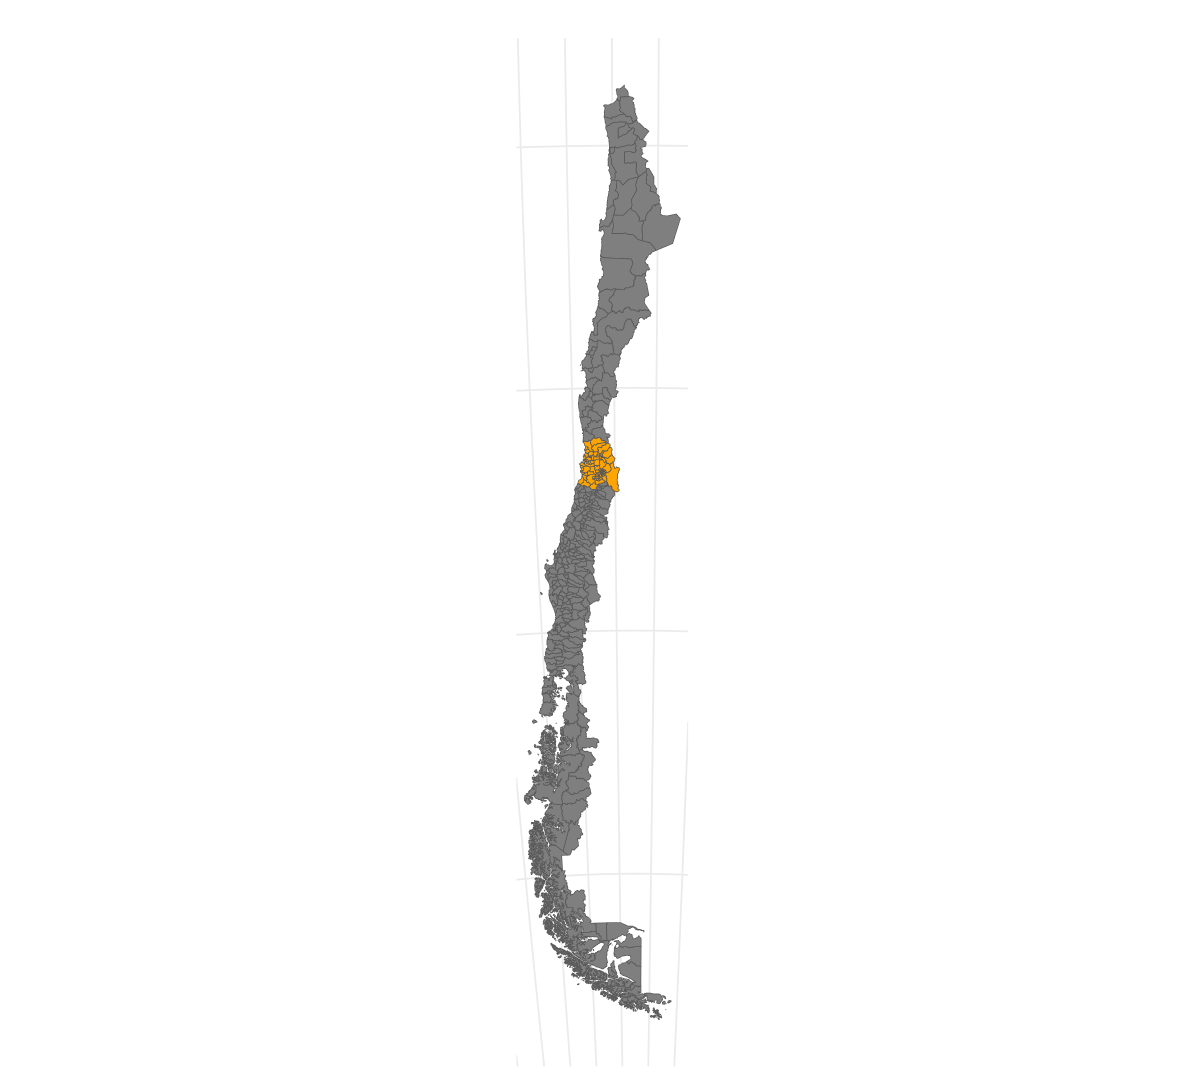

In [ ]:
#TODO CHILE
mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("15","01","02","03","04","05","13","06","07","16","08","09","14","10","11","12"))

bb <- st_bbox(c(xmin = -76, xmax = -66, ymin = -56, ymax = -17), crs = st_crs(mapa_sf))

mapa_sf4_cropped <- st_crop(mapa_sf4, bb)
mapa_sf4_proj <- st_transform(mapa_sf4_cropped, crs = 5361)

mapa_sf4_proj$color_region <- factor(mapa_sf4_proj$codigo_region,
                                     levels = c("15","01","02","03","04","05","13","06","07","16","08","09","14","10","11","12"))

# colores_regiones <- c("15" = "#D8EEDB","01" = "#FFE9D5","02" = "#FFF2CC","03" = "#BDD9F8","04" = "#FFD0E0",
#                       "05" = "#CCE7E8","13" = "#D9D2E9",
#                       "06" = "#EAD1DC","07" = "#C9E1D5","16" = "#EFD1E0","08" = "#C9DFE1",
#                       "09" = "#D9C2E9","14" = "#EFD0C0","10" = "#CFD9E8",
#                       "11" = "#D0EEDC","12" = "#FFF1E1")

colores_regiones <- c("05" = "#FFA500","13" = "#FFA500")

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_region)) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank()
  ) +
 scale_fill_manual(values = colores_regiones, guide = FALSE)



In [ ]:
citation("ggplot2")

To cite ggplot2 in publications, please use

  H. Wickham. ggplot2: Elegant Graphics for Data Analysis.
  Springer-Verlag New York, 2016.

A BibTeX entry for LaTeX users is

  @Book{,
    author = {Hadley Wickham},
    title = {ggplot2: Elegant Graphics for Data Analysis},
    publisher = {Springer-Verlag New York},
    year = {2016},
    isbn = {978-3-319-24277-4},
    url = {https://ggplot2.tidyverse.org},
  }

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


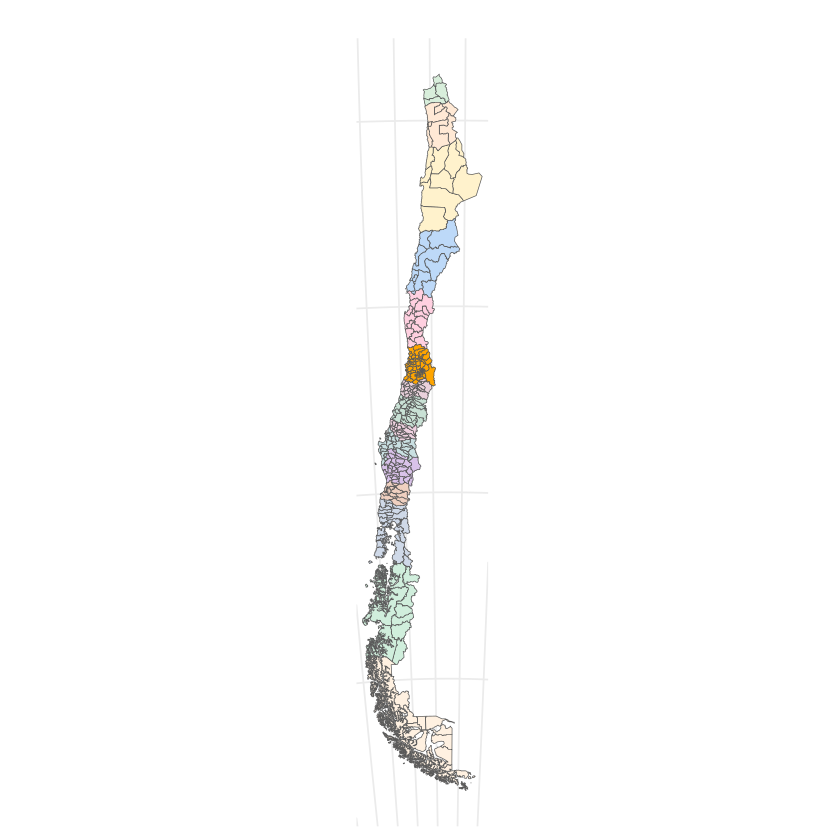

In [ ]:
mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("15","01","02","03","04","05","13","06","07","16","08","09","14","10","11","12"))

bb <- st_bbox(c(xmin = -76, xmax = -66, ymin = -56, ymax = -17), crs = st_crs(mapa_sf))

mapa_sf4_cropped <- st_crop(mapa_sf4, bb)
mapa_sf4_proj <- st_transform(mapa_sf4_cropped, crs = 5361)

mapa_sf4_proj$color_region <- factor(mapa_sf4_proj$codigo_region,
                                     levels = c("15","01","02","03","04","05","13","06","07","16","08","09","14","10","11","12"))
#Color a cambiar -> #FFA500
colores_regiones <- c("15" = "#D8EEDB","01" = "#FFE9D5","02" = "#FFF2CC","03" = "#BDD9F8","04" = "#FFD0E0",
                      "05" = "#FFA500","13" = "#FFA500",
                      "06" = "#EAD1DC","07" = "#C9E1D5","16" = "#EFD1E0","08" = "#C9DFE1",
                      "09" = "#D9C2E9","14" = "#EFD0C0","10" = "#CFD9E8",
                      "11" = "#D0EEDC","12" = "#FFF1E1")


ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_region)) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank()
  ) +
  scale_fill_manual(values = colores_regiones, guide = FALSE)



In [ ]:
CODIGO 2:
# 01 - ZONA NORTE
bb <- st_bbox(c(xmin = -78, xmax = -65, ymin = -56, ymax = -17), crs = st_crs(mapa_sf))
mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("15","01","02","03"))
mapa_sf4_cropped <- st_crop(mapa_sf4, bb)
mapa_sf4_proj <- st_transform(mapa_sf4_cropped, crs = 5361)
mapa_sf4_proj$color_region <- factor(mapa_sf4_proj$codigo_region,
                                     levels = c("15","01","02","03"))
mapa_sf4_region <- mapa_sf4_proj %>%
  group_by(nombre_region, color_region) %>%
  summarize(.groups = "drop")

mapa_sf4_region$centroide <- st_centroid(mapa_sf4_region$geometry)
mapa_sf4_region$x <- st_coordinates(mapa_sf4_region$centroide)[, 1]
mapa_sf4_region$y <- st_coordinates(mapa_sf4_region$centroide)[, 2]

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_region)) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  ) +
  scale_fill_manual(name="",
                    values = c("15" = "#D8EEDB","01" = "#FFE9D5","02" = "#FFF2CC","03" = "#BDD9F8"),
                    labels = mapa_sf4$nombre_region) +
  geom_text_repel(aes(x = x, y = y, label = nombre_region), size =3, color = "black", nudge_x = -0.5, data = mapa_sf4_region) +
  guides(fill="none")


ERROR: ignored

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


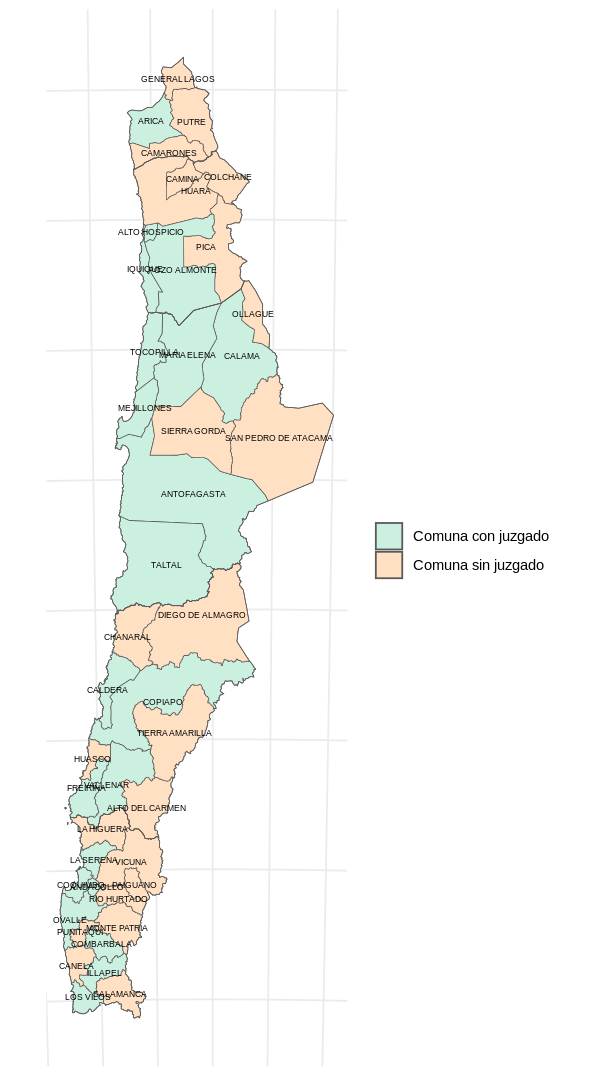

In [ ]:
# Prepara los datos como en CODIGO 1
mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("15", "01", "02", "03", "04"))
mapa_sf4_proj <- st_transform(mapa_sf4, crs = 5361)
mapa_sf4_proj$color_comuna <- ifelse(mapa_sf4_proj$nombre_comuna %in% c(
  "ALTO HOSPICIO","ANDACOLLO","ANTOFAGASTA","ARICA","CALAMA","CALDERA","CHAÑARAL","COMBARBALA","COPIAPO","COQUIMBO",
  "DIEGO ALMAGRO", "FREIRINA", "ILLAPEL", "IQUIQUE", "LA SERENA", "LOS VILOS", "MARIA ELENA", "MEJILLONES","OVALLE",
  "POZO ALMONTE","TALTAL","TOCOPILLA","VALLENAR","VICUÑA"),
"Comuna con juzgado" , "Comuna sin juzgado")

bb <- st_bbox(c(xmin = -78, xmax = -65, ymin = -56, ymax = -17), crs = st_crs(mapa_sf))
mapa_sf4_cropped <- st_crop(mapa_sf4, bb)
mapa_sf4_proj_2 <- st_transform(mapa_sf4_cropped, crs = 5361)
mapa_sf4_proj_2$color_region <- factor(mapa_sf4_proj_2$codigo_region,
                                      levels = c("15","01","02","03"))
mapa_sf4_region <- mapa_sf4_proj_2 %>%
  group_by(nombre_region, color_region) %>%
  summarize(.groups = "drop")
mapa_sf4_region$centroide <- st_centroid(mapa_sf4_region$geometry)

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_comuna)) +
  geom_sf(data = mapa_sf4_region, fill = NA)+#, color = "red", lwd = 1) +  # aumenta el tamaño aquí
  geom_sf_text(aes(label = nombre_comuna), nudge_y = 0, nudge_x = 0, size = 1.8) +
  theme_minimal() +
  labs(title = NULL) +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  ) +
  scale_fill_manual(name="",values = c("Comuna con juzgado" = "#CCF0E0", "Comuna sin juzgado" = "#FFE0C2"))

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


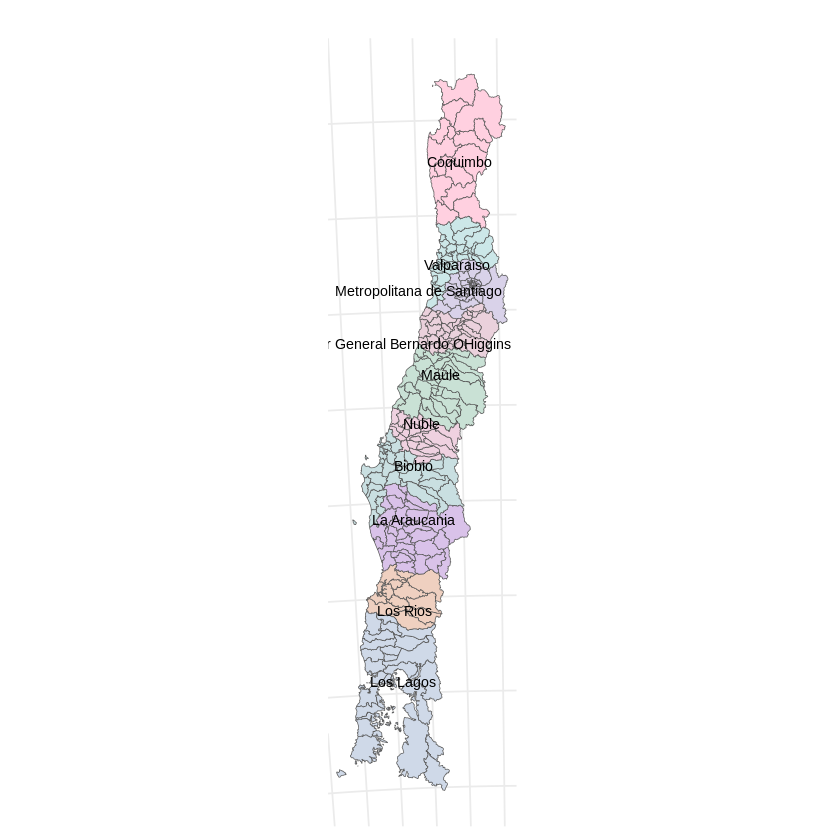

In [ ]:
bb <- st_bbox(c(xmin = -78, xmax = -65, ymin = -56, ymax = -17), crs = st_crs(mapa_sf))


mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("04","05","13","06","07","16","08","09","14","10"))


mapa_sf4_cropped <- st_crop(mapa_sf4, bb)
mapa_sf4_proj <- st_transform(mapa_sf4_cropped, crs = 5361)


mapa_sf4_proj$color_region <- factor(mapa_sf4_proj$codigo_region,
                                     levels = c("04","05","13","06","07","16","08","09","14","10"))

mapa_sf4_region <- mapa_sf4_proj %>%
  group_by(nombre_region, color_region) %>%
  summarize(.groups = "drop")

mapa_sf4_region$centroide <- st_centroid(mapa_sf4_region$geometry)
mapa_sf4_region$x <- st_coordinates(mapa_sf4_region$centroide)[, 1]
mapa_sf4_region$y <- st_coordinates(mapa_sf4_region$centroide)[, 2]

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_region)) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  ) +
  scale_fill_manual(name="",
                    values = c("04" = "#FFD0E0",
                      "05" = "#CCE7E8","13" = "#D9D2E9",
                      "06" = "#EAD1DC","07" = "#C9E1D5","16" = "#EFD1E0","08" = "#C9DFE1",
                      "09" = "#D9C2E9","14" = "#EFD0C0","10" = "#CFD9E8"),
                    labels = mapa_sf4$nombre_region) +
  geom_text_repel(aes(x = x, y = y, label = nombre_region), size =3, color = "black", nudge_x = -0.5, data = mapa_sf4_region) +
  guides(fill="none")

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


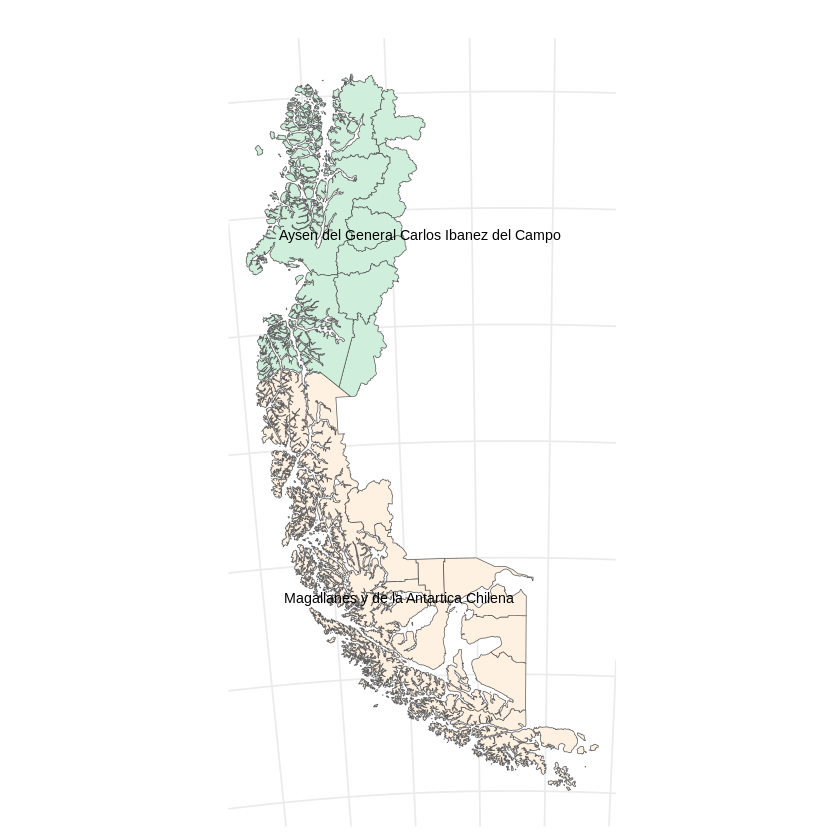

In [ ]:
#Zona 2
bb <- st_bbox(c(xmin = -78, xmax = -65, ymin = -56, ymax = -17), crs = st_crs(mapa_sf))
mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("11","12"))
mapa_sf4_cropped <- st_crop(mapa_sf4, bb)
mapa_sf4_proj <- st_transform(mapa_sf4_cropped, crs = 5361)
mapa_sf4_proj$color_region <- factor(mapa_sf4_proj$codigo_region,
                                     levels = c("11","12"))
mapa_sf4_region <- mapa_sf4_proj %>%
  group_by(nombre_region, color_region) %>%
  summarize(.groups = "drop")

mapa_sf4_region$centroide <- st_centroid(mapa_sf4_region$geometry)
mapa_sf4_region$x <- st_coordinates(mapa_sf4_region$centroide)[, 1]
mapa_sf4_region$y <- st_coordinates(mapa_sf4_region$centroide)[, 2]

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_region)) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  ) +
  scale_fill_manual(name="",
                    values = c("11" = "#D0EEDC","12" = "#FFF1E1"),
                    labels = mapa_sf4$nombre_region) +
  geom_text_repel(aes(x = x, y = y, label = nombre_region), size =3, color = "black", nudge_x = -0.5, data = mapa_sf4_region) +
  guides(fill="none")

In [ ]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
names(conduccion)
  filter(codigo_region %in% c("04","05","13","06","07","16","08","09","14","10"))

[1] "NOMBRE COMUNA"    "CORTE"            "COD. MATERIA"     "MATERIA"         
 [5] "FECHA INGRESO"    "MES INGRESO"      "AÑO INGRESO"      "TRIBUNAL"        
 [9] "COD. COMUNA"      "NOMBRE PROVINCIA" "NOMBRE REGION"

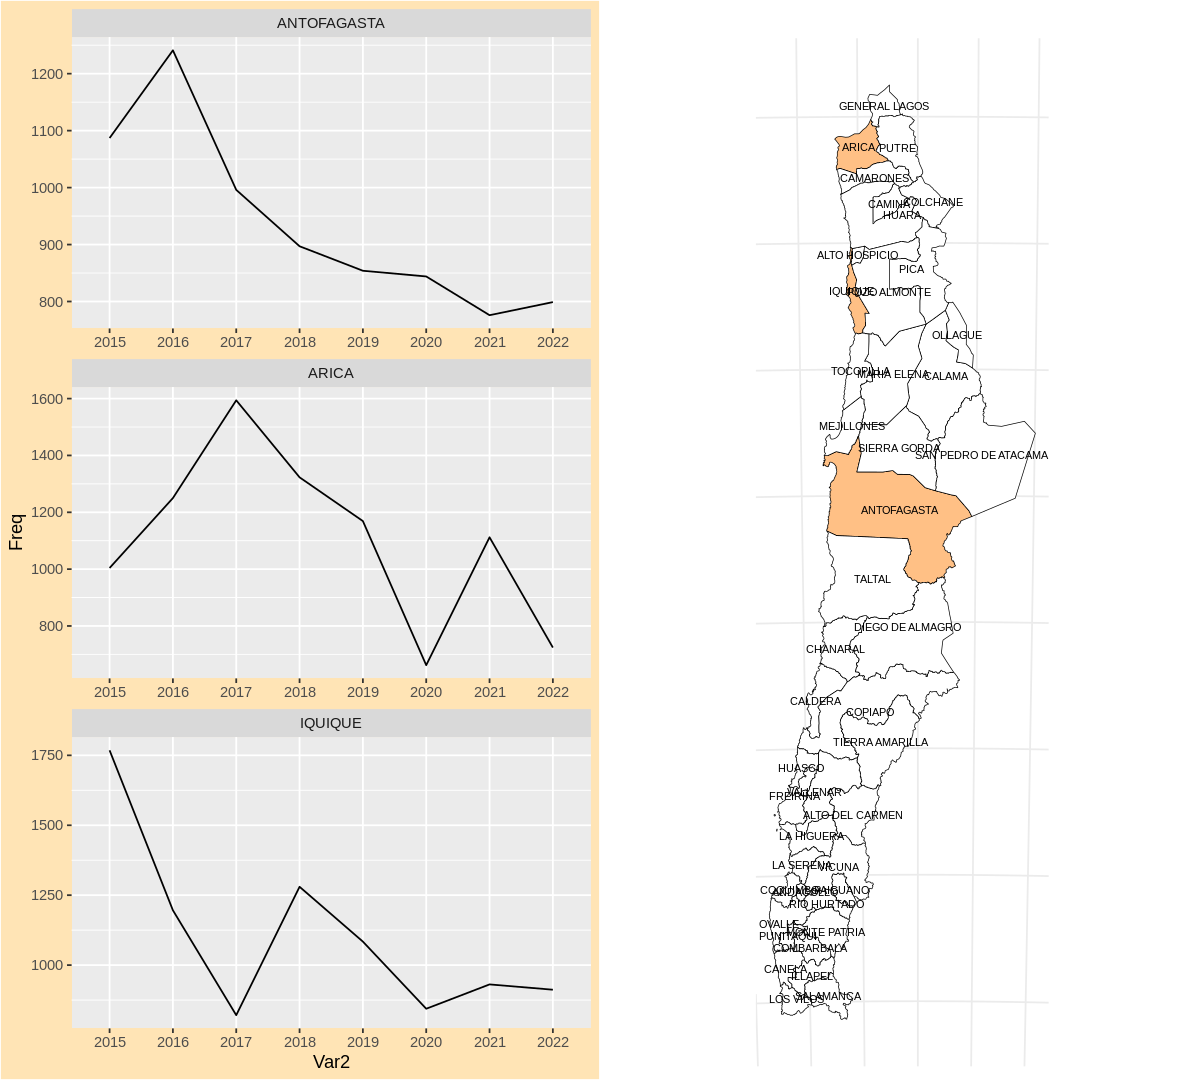

In [ ]:

library(gridExtra)

options(repr.plot.width=10, repr.plot.height=9)
norte_filtrado <- subset(conduccion, `NOMBRE REGION` %in% c("DE ARICA Y PARINACOTA", "DE ANTOFAGASTA", "DE TARAPACA", "DE ATACAMA", "DE COQUIMBO"))

comunas_interes <- c("ARICA", "IQUIQUE", "ANTOFAGASTA")
comunas_filtrado <- norte_filtrado %>% filter(`NOMBRE COMUNA` %in% comunas_interes)



table_year <- table(comunas_filtrado$`NOMBRE COMUNA`, comunas_filtrado$`AÑO INGRESO`)
table_year <- as.data.frame(table_year)




grafico1 <- table_year %>%
  ggplot(aes(x = Var2, y = Freq, group = Var1)) +
  geom_line() +
  facet_wrap(vars(Var1), ncol = 1, scales = "free") +
  theme(
    legend.position = "none",
    plot.background = element_rect(fill = "moccasin")
  )

mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("15","01","02","03","04"))

mapa_sf4_proj <- st_transform(mapa_sf4, crs = 5361)

mapa_sf4_proj$color_comuna <- mapa_sf4_proj$nombre_comuna %in% c("ARICA","IQUIQUE","ANTOFAGASTA")

grafico2 <- ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_comuna), color = "black") +
  geom_sf_text(aes(label = nombre_comuna), nudge_y = 0, nudge_x = 0, size = 2.3) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x=element_blank(),
    axis.title.y=element_blank()
  ) +
  scale_fill_manual(values = c("TRUE" = "#FFC085", "FALSE" = "white"), guide = "none")

# Arrange the plots side by side
grid.arrange(grafico1, grafico2, ncol=2)


In [ ]:
unique(conduccion$`NOMBRE REGION`)

[1] "DE TARAPACA"                            
 [2] "DE LOS LAGOS"                           
 [3] "DE COQUIMBO"                            
 [4] "DE LA ARAUCANIA"                        
 [5] "DE ANTOFAGASTA"                         
 [6] "DEL BIOBIO"                             
 [7] "DE ARICA Y PARINACOTA"                  
 [8] "DE ÑUBLE"                               
 [9] "DE MAGALLANES Y DE LA ANTARTICA CHILENA"
[10] "DE ATACAMA"                             
[11] "DE VALPARAISO"                          
[12] "DEL MAULE"                              
[13] "DE AISEN DEL GRAL. C. IBAÑEZ DEL CAMPO" 
[14] "METROPOLITANA DE SANTIAGO"              
[15] "DEL LIBERTADOR B. O'HIGGINS"            
[16] "DE LOS RIOS"

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


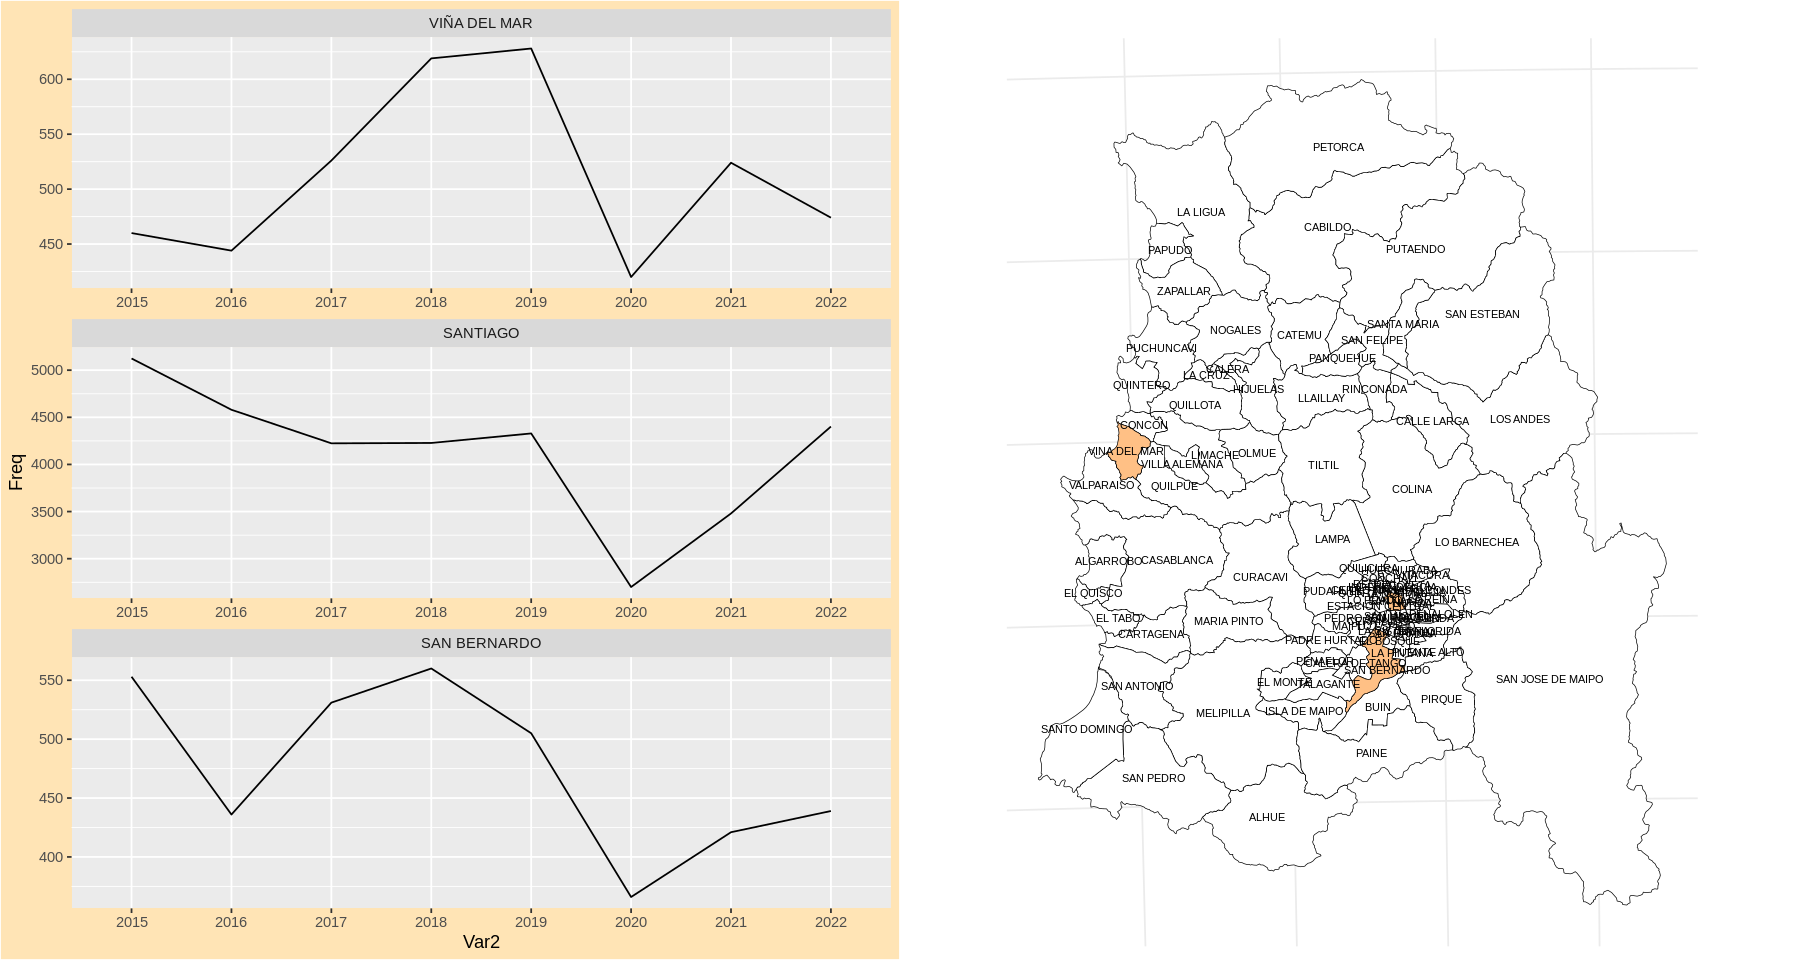

In [ ]:
library(gridExtra)

options(repr.plot.width=15, repr.plot.height=8)
centro_metro_filtrado <- subset(conduccion, `NOMBRE REGION` %in% c("DE VALPARAISO","METROPOLITANA DE SANTIAGO"))

comunas_interes <- c("VIÑA DEL MAR","SANTIAGO","SAN BERNARDO")
comunas_filtrado <- centro_metro_filtrado %>% filter(`NOMBRE COMUNA` %in% comunas_interes)

table_year <- table(comunas_filtrado$`NOMBRE COMUNA`, comunas_filtrado$`AÑO INGRESO`)
table_year <- as.data.frame(table_year)

# Reordenar los niveles de Var1
table_year$Var1 <- factor(table_year$Var1, levels = comunas_interes)

grafico1 <- table_year %>%
  ggplot(aes(x = Var2, y = Freq, group = Var1)) +
  geom_line() +
  facet_wrap(vars(Var1), ncol = 1, scales = "free") +
  theme(
    legend.position = "none",
    plot.background = element_rect(fill = "moccasin")
  )

bb <- st_bbox(c(xmin = -72, xmax = -69, ymin = -35, ymax = -31), crs = st_crs(mapa_sf))
mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("05","13"))
mapa_sf4_cropped <- st_crop(mapa_sf4, bb)
# Proyectar
mapa_sf4_proj <- st_transform(mapa_sf4_cropped, crs = 5361)


mapa_sf4_proj$color_comuna <- mapa_sf4_proj$nombre_comuna %in% c("VINA DEL MAR","SANTIAGO","SAN BERNARDO")

grafico2 <- ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_comuna), color = "black") +
  geom_sf_text(aes(label = nombre_comuna), nudge_y = 0, nudge_x = 0, size = 2.3) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x=element_blank(),
    axis.title.y=element_blank()
  ) +
  scale_fill_manual(values = c("TRUE" = "#FFC085", "FALSE" = "white"), guide = "none")

# Arrange the plots side by side
grid.arrange(grafico1, grafico2, ncol=2)

In [ ]:
unique(conduccion$`NOMBRE COMUNA`)

[1] "ALTO HOSPICIO"           "ANCUD"                  
  [3] "ANDACOLLO"               "ANGOL"                  
  [5] "ANTOFAGASTA"             "ARAUCO"                 
  [7] "ARICA"                   "BULNES"                 
  [9] "CABO HORNOS"             "CABRERO"                
 [11] "CALAMA"                  "CALBUCO"                
 [13] "CALDERA"                 "CAÑETE"                 
 [15] "CARAHUE"                 "CASABLANCA"             
 [17] "CASTRO"                  "CAUQUENES"              
 [19] "CHAITEN"                 "CHANCO"                 
 [21] "CHAÑARAL"                "CHIGUAYANTE"            
 [23] "CHILE CHICO"             "CHILLAN"                
 [25] "CISNES"                  "COCHRANE"               
 [27] "COELEMU"                 "COLINA"                 
 [29] "COLLIPULLI"              "COMBARBALA"             
 [31] "CONCEPCION"              "CONSTITUCION"           
 [33] "COPIAPO"                 "COQUIMBO"               
 [35] "CORONEL"                 "COYHAIQUE"              
 [37] "CURACAUTIN"              "CURACAVI"               
 [39] "CURANILAHUE"             "CUREPTO"                
 [41] "CURICO"                  "DIEGO ALMAGRO"          
 [43] "FLORIDA"                 "FREIRINA"               
 [45] "GRANEROS"                "HUALAIHUE"              
 [47] "ILLAPEL"                 "IQUIQUE"                
 [49] "ISLA PASCUA"             "LA CALERA"              
 [51] "LA LIGUA"                "LA SERENA"              
 [53] "LA UNION"                "LAJA"                   
 [55] "LAUTARO"                 "LEBU"                   
 [57] "LICANTEN"                "LIMACHE"                
 [59] "LINARES"                 "LITUECHE"               
 [61] "LONCOCHE"                "LOS ANDES"              
 [63] "LOS ANGELES"             "LOS LAGOS"              
 [65] "LOS MUERMOS"             "LOS VILOS"              
 [67] "LOTA"                    "MARIA ELENA"            
 [69] "MARIQUINA"               "MAULLIN"                
 [71] "MEJILLONES"              "MELIPILLA"              
 [73] "MOLINA"                  "MULCHEN"                
 [75] "NACIMIENTO"              "NUEVA IMPERIAL"         
 [77] "OSORNO"                  "OVALLE"                 
 [79] "PAILLACO"                "PANGUIPULLI"            
 [81] "PARRAL"                  "PERALILLO"              
 [83] "PETORCA"                 "PEUMO"                  
 [85] "PICHILEMU"               "PITRUFQUEN"             
 [87] "PORVENIR"                "POZO ALMONTE"           
 [89] "PUCON"                   "PUENTE ALTO"            
 [91] "PUERTO AYSEN"            "PUERTO MONTT"           
 [93] "PUERTO NATALES"          "PUERTO VARAS"           
 [95] "PUNTA ARENAS"            "PUREN"                  
 [97] "PUTAENDO"                "QUELLON"                
 [99] "QUILLOTA"                "QUILPUE"                
[101] "QUINCHAO"                "QUINTERO"               
[103] "QUIRIHUE"                "RANCAGUA"               
[105] "RENGO"                   "RIO BUENO"              
[107] "RIO NEGRO"               "SAN ANTONIO"            
[109] "SAN BERNARDO"            "SAN CARLOS"             
[111] "SAN FELIPE"              "SAN FERNANDO"           
[113] "SAN JAVIER"              "SAN MIGUEL"             
[115] "SAN PEDRO LA PAZ"        "SAN VICENTE TAGUA-TAGUA"
[117] "SANTA BARBARA"           "SANTA CRUZ"             
[119] "SANTA JUANA"             "SANTIAGO"               
[121] "TALAGANTE"               "TALCA"                  
[123] "TALCAHUANO"              "TALTAL"                 
[125] "TEMUCO"                  "TOCOPILLA"              
[127] "TOLTEN"                  "TOME"                   
[129] "TRAIGUEN"                "VALDIVIA"               
[131] "VALLENAR"                "VALPARAISO"             
[133] "VICTORIA"                "VICUÑA"                 
[135] "VILLA ALEMANA"           "VILLARRICA"             
[137] "VIÑA DEL MAR"            "YUMBEL"                 


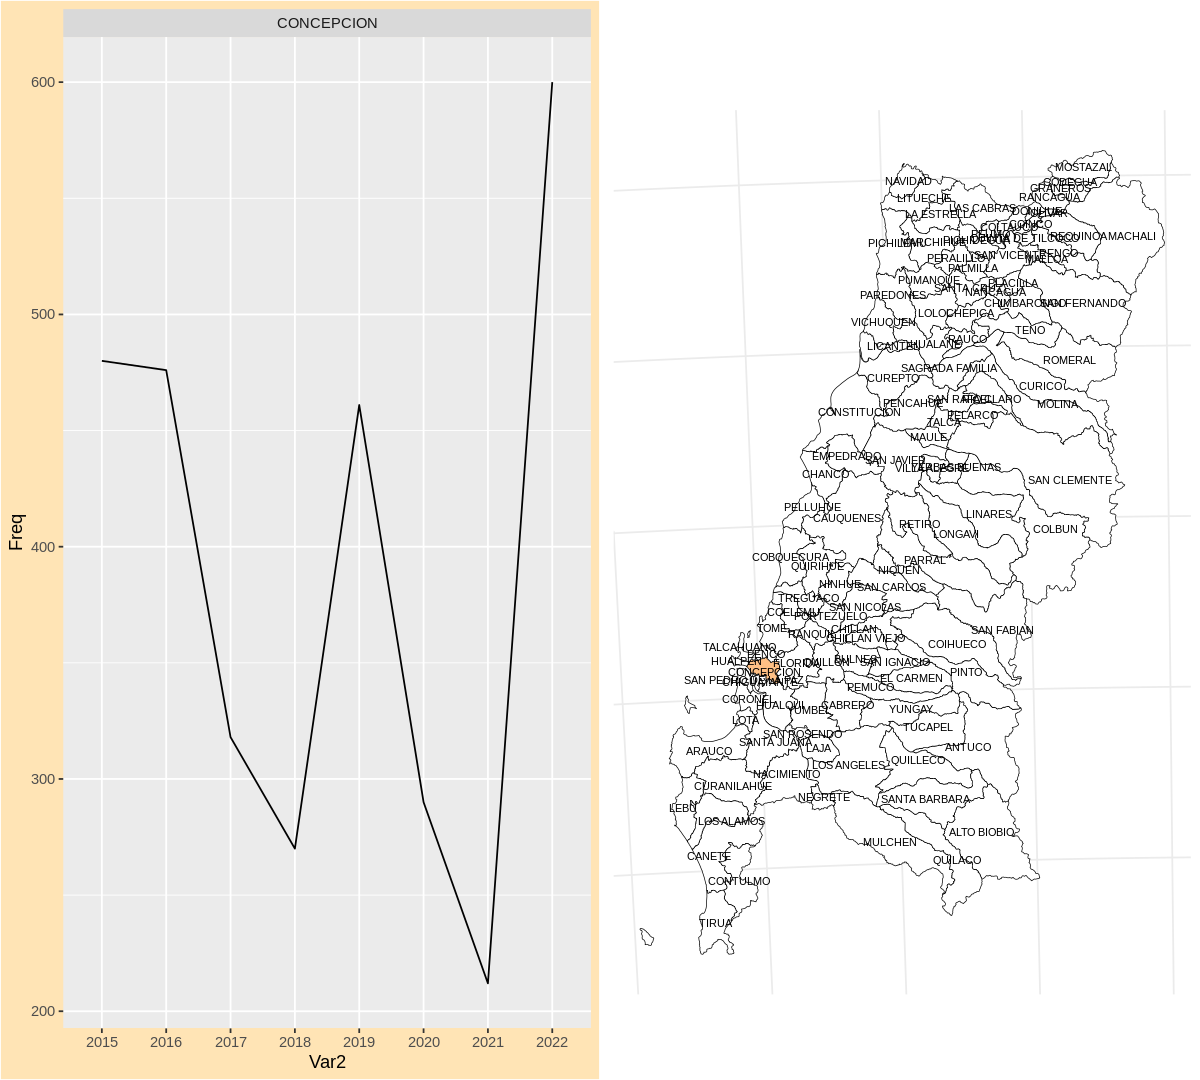

In [ ]:
# ZONA 3: VI, VII, XVI, VIII (CENTRO): 47 comunas
#   DEL LIBERTADOR B. O'HIGGINS(10), DEL MAULE(11), DE ÑUBLE(6), DEL BIOBIO(20)


library(gridExtra)

options(repr.plot.width=10, repr.plot.height=9)
norte_filtrado <- subset(conduccion, `NOMBRE REGION` %in% c("DEL LIBERTADOR B. O'HIGGINS", "DEL MAULE", "DE ÑUBLE", "DEL BIOBIO"))

comunas_interes <- c("CONCEPCION", "IQUIQUE", "ANTOFAGASTA")
comunas_filtrado <- norte_filtrado %>% filter(`NOMBRE COMUNA` %in% comunas_interes)



table_year <- table(comunas_filtrado$`NOMBRE COMUNA`, comunas_filtrado$`AÑO INGRESO`)
table_year <- as.data.frame(table_year)




grafico1 <- table_year %>%
  ggplot(aes(x = Var2, y = Freq, group = Var1)) +
  geom_line() +
  facet_wrap(vars(Var1), ncol = 1, scales = "free") +
  theme(
    legend.position = "none",
    plot.background = element_rect(fill = "moccasin")
  )

mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("06","07","16","08"))

mapa_sf4_proj <- st_transform(mapa_sf4, crs = 5361)

mapa_sf4_proj$color_comuna <- mapa_sf4_proj$nombre_comuna %in% c("CONCEPCION","IQUIQUE","ANTOFAGASTA")

grafico2 <- ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_comuna), color = "black") +
  geom_sf_text(aes(label = nombre_comuna), nudge_y = 0, nudge_x = 0, size = 2.3) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x=element_blank(),
    axis.title.y=element_blank()
  ) +
  scale_fill_manual(values = c("TRUE" = "#FFC085", "FALSE" = "white"), guide = "none")

# Arrange the plots side by side
grid.arrange(grafico1, grafico2, ncol=2)


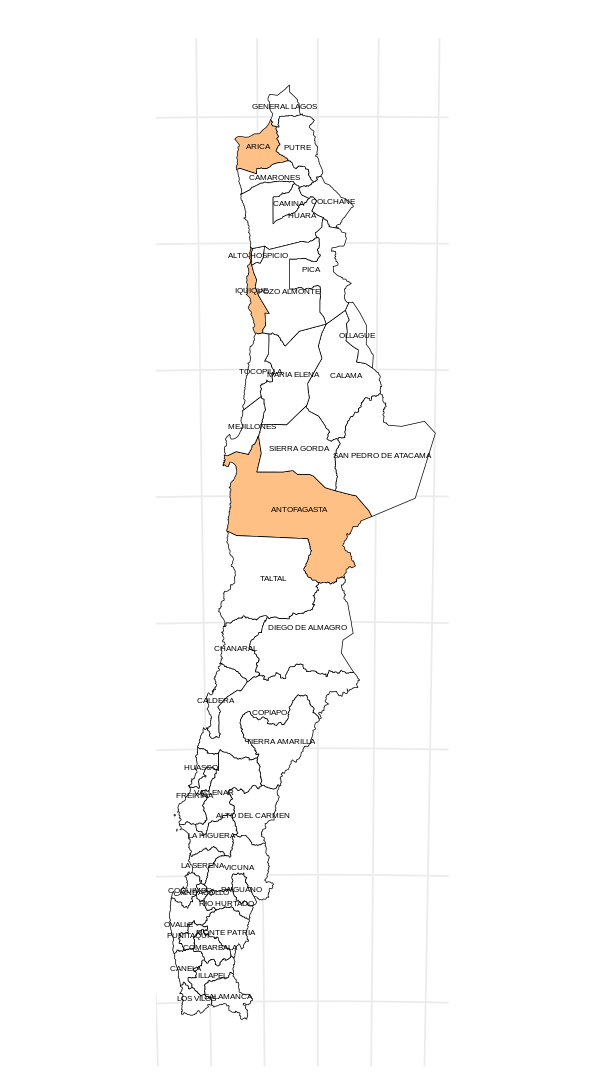

In [ ]:
#"#FFA500"
# 01 - ZONA NORTE

mapa_sf4_proj$color_comuna <- mapa_sf4_proj$nombre_comuna %in% c("ANTOFAGASTA","ARICA","IQUIQUE")
ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_comuna), color = "black") +
  geom_sf_text(aes(label = nombre_comuna), nudge_y = 0, nudge_x = 0, size = 1.7) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.x=element_blank(),
    axis.title.y=element_blank()
  ) +
  scale_fill_manual(values = c("TRUE" = "#FFC085", "FALSE" = "white"), guide = "none")

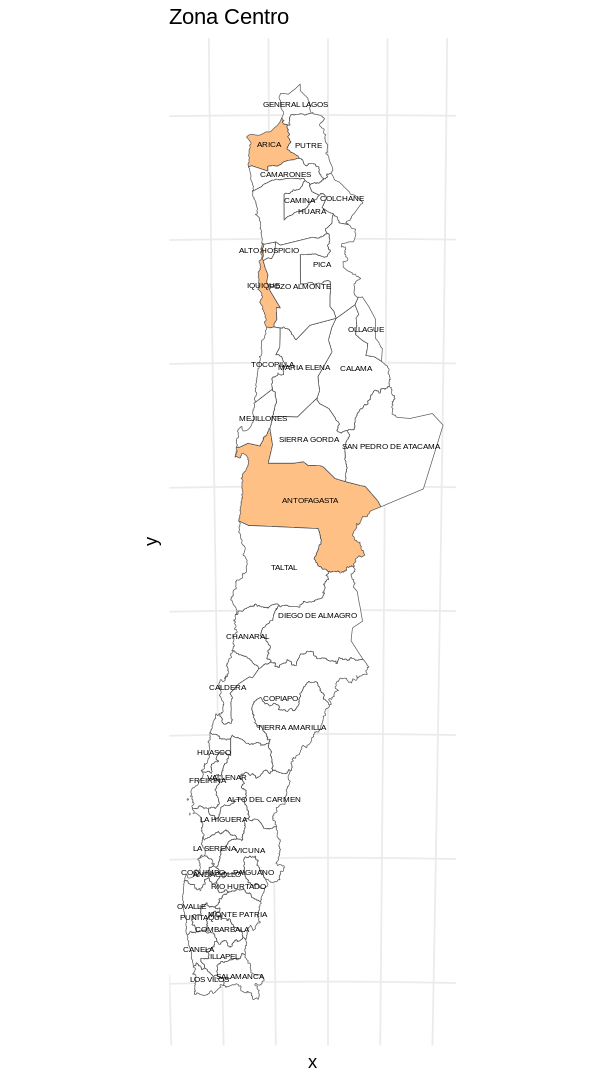

In [ ]:
#"#FFA500"
# 01 - ZONA NORTE
mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("15", "01", "02", "03", "04"))

# Proyectar
mapa_sf4_proj <- st_transform(mapa_sf4, crs = 5361)

mapa_sf4_proj$color_comuna <- ifelse(mapa_sf4_proj$nombre_comuna %in% c(
            "ANTOFAGASTA","ARICA","IQUIQUE"            ),
"Comuna con juzgado" , "Comuna sin juzgado" )

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_comuna)) +
  geom_sf_text(aes(label = nombre_comuna), nudge_y = 0, nudge_x = 0, size = 1.7) +
  theme_minimal() +
  labs(title = "Zona Centro") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank()
  ) +
#  scale_fill_manual(name="",values = c("Comuna con juzgado" = "#A8D5BA", "Comuna sin juzgado" = "#FFC085"))
  scale_fill_manual(name="",values = c("Comuna con juzgado" = "#FFC085", "Comuna sin juzgado" = "white")) +
    guides(fill="none")

In [ ]:
unique(conduccion$`NOMBRE COMUNA`)

[1] "ALTO HOSPICIO"           "ANCUD"                  
  [3] "ANDACOLLO"               "ANGOL"                  
  [5] "ANTOFAGASTA"             "ARAUCO"                 
  [7] "ARICA"                   "BULNES"                 
  [9] "CABO HORNOS"             "CABRERO"                
 [11] "CALAMA"                  "CALBUCO"                
 [13] "CALDERA"                 "CAÑETE"                 
 [15] "CARAHUE"                 "CASABLANCA"             
 [17] "CASTRO"                  "CAUQUENES"              
 [19] "CHAITEN"                 "CHANCO"                 
 [21] "CHAÑARAL"                "CHIGUAYANTE"            
 [23] "CHILE CHICO"             "CHILLAN"                
 [25] "CISNES"                  "COCHRANE"               
 [27] "COELEMU"                 "COLINA"                 
 [29] "COLLIPULLI"              "COMBARBALA"             
 [31] "CONCEPCION"              "CONSTITUCION"           
 [33] "COPIAPO"                 "COQUIMBO"               
 [35] "CORONEL"                 "COYHAIQUE"              
 [37] "CURACAUTIN"              "CURACAVI"               
 [39] "CURANILAHUE"             "CUREPTO"                
 [41] "CURICO"                  "DIEGO ALMAGRO"          
 [43] "FLORIDA"                 "FREIRINA"               
 [45] "GRANEROS"                "HUALAIHUE"              
 [47] "ILLAPEL"                 "IQUIQUE"                
 [49] "ISLA PASCUA"             "LA CALERA"              
 [51] "LA LIGUA"                "LA SERENA"              
 [53] "LA UNION"                "LAJA"                   
 [55] "LAUTARO"                 "LEBU"                   
 [57] "LICANTEN"                "LIMACHE"                
 [59] "LINARES"                 "LITUECHE"               
 [61] "LONCOCHE"                "LOS ANDES"              
 [63] "LOS ANGELES"             "LOS LAGOS"              
 [65] "LOS MUERMOS"             "LOS VILOS"              
 [67] "LOTA"                    "MARIA ELENA"            
 [69] "MARIQUINA"               "MAULLIN"                
 [71] "MEJILLONES"              "MELIPILLA"              
 [73] "MOLINA"                  "MULCHEN"                
 [75] "NACIMIENTO"              "NUEVA IMPERIAL"         
 [77] "OSORNO"                  "OVALLE"                 
 [79] "PAILLACO"                "PANGUIPULLI"            
 [81] "PARRAL"                  "PERALILLO"              
 [83] "PETORCA"                 "PEUMO"                  
 [85] "PICHILEMU"               "PITRUFQUEN"             
 [87] "PORVENIR"                "POZO ALMONTE"           
 [89] "PUCON"                   "PUENTE ALTO"            
 [91] "PUERTO AYSEN"            "PUERTO MONTT"           
 [93] "PUERTO NATALES"          "PUERTO VARAS"           
 [95] "PUNTA ARENAS"            "PUREN"                  
 [97] "PUTAENDO"                "QUELLON"                
 [99] "QUILLOTA"                "QUILPUE"                
[101] "QUINCHAO"                "QUINTERO"               
[103] "QUIRIHUE"                "RANCAGUA"               
[105] "RENGO"                   "RIO BUENO"              
[107] "RIO NEGRO"               "SAN ANTONIO"            
[109] "SAN BERNARDO"            "SAN CARLOS"             
[111] "SAN FELIPE"              "SAN FERNANDO"           
[113] "SAN JAVIER"              "SAN MIGUEL"             
[115] "SAN PEDRO LA PAZ"        "SAN VICENTE TAGUA-TAGUA"
[117] "SANTA BARBARA"           "SANTA CRUZ"             
[119] "SANTA JUANA"             "SANTIAGO"               
[121] "TALAGANTE"               "TALCA"                  
[123] "TALCAHUANO"              "TALTAL"                 
[125] "TEMUCO"                  "TOCOPILLA"              
[127] "TOLTEN"                  "TOME"                   
[129] "TRAIGUEN"                "VALDIVIA"               
[131] "VALLENAR"                "VALPARAISO"             
[133] "VICTORIA"                "VICUÑA"                 
[135] "VILLA ALEMANA"           "VILLARRICA"             
[137] "VIÑA DEL MAR"            "YUMBEL"                 


Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


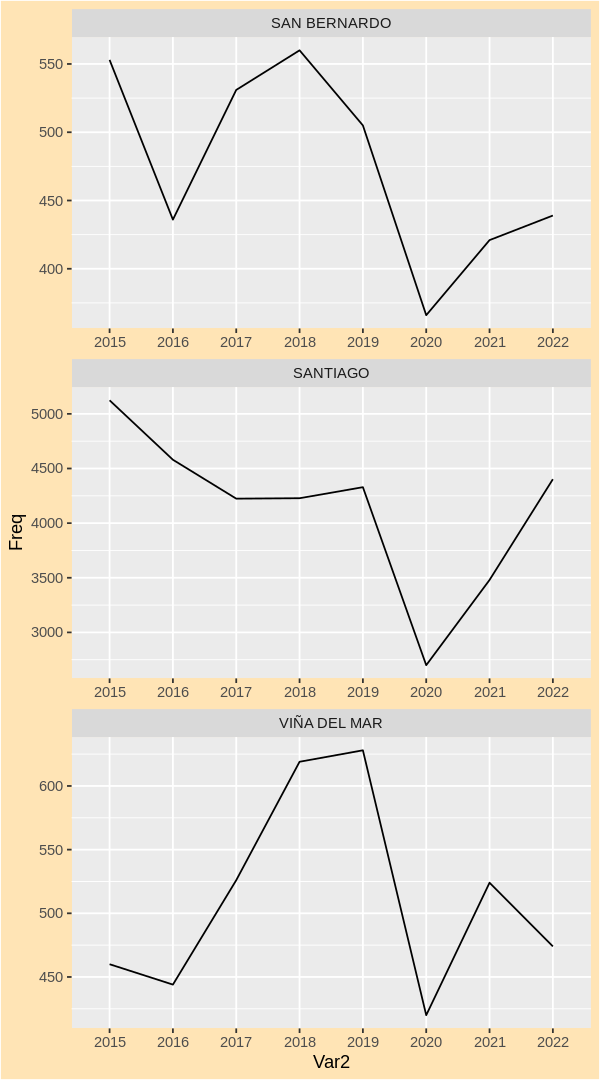

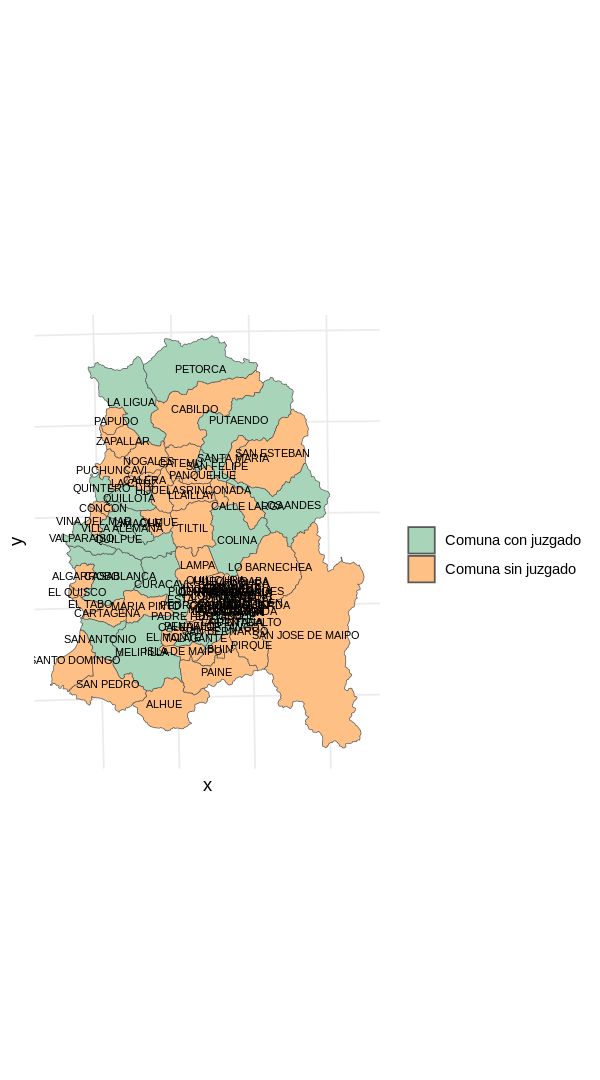

In [ ]:
#(1) Mayor catidad de registrso en la Zona 2: Centro-Metropolitana

options(repr.plot.width=5, repr.plot.height=9)
norte_filtrado <- subset(conduccion, `NOMBRE REGION` %in% c("DE VALPARAISO" , "METROPOLITANA DE SANTIAGO"))

# Filtrar solo las comunas de interés
comunas_interes <- c("SANTIAGO", "VIÑA DEL MAR", "SAN BERNARDO")
comunas_filtrado <- norte_filtrado %>% filter(`NOMBRE COMUNA` %in% comunas_interes)

table_year <- table(comunas_filtrado$`NOMBRE COMUNA`, comunas_filtrado$`AÑO INGRESO`)
table_year <- as.data.frame(table_year)

# Asumiendo que tu dataframe se llama table_year y tiene las columnas Var1, Var2 y Freq
result <- aggregate(Freq ~ Var1, data = table_year, sum)

table_year %>%
  ggplot(aes(x = Var2, y = Freq, group = Var1)) +
  geom_line() +
  facet_wrap(vars(Var1), ncol = 1, scales = "free") +
  theme(
    legend.position = "none",
    plot.background = element_rect(fill = "moccasin")
  )


  #MAPA
  # 02 - ZONA CENTRO-METROPOLITANA
bb <- st_bbox(c(xmin = -72, xmax = -69, ymin = -35, ymax = -31), crs = st_crs(mapa_sf))

mapa_sf4 <- mapa_sf %>%
  filter(codigo_region %in% c("05","13"))

mapa_sf4_cropped <- st_crop(mapa_sf4, bb)

# Proyectar
mapa_sf4_proj <- st_transform(mapa_sf4_cropped, crs = 5361)

mapa_sf4_proj$color_comuna <- ifelse(mapa_sf4_proj$nombre_comuna %in% c(
            "CASABLANCA", "COLINA", "CURACAVI", "ISLA PASCUA", "LA CALERA", "LA LIGUA", "LIMACHE", "LOS ANDES", "MELIPILLA",
            "PETORCA","PUENTE ALTO", "PUTAENDO", "QUILLOTA", "QUILPUE", "QUINTERO", "SAN ANTONIO", "SAN BERNARDO", "SAN FELIPE",
            "SAN MIGUEL","SANTIAGO", "TALAGANTE", "VALPARAISO", "VILLA ALEMANA", "VIÑA DEL MAR"
            ),
"Comuna con juzgado" , "Comuna sin juzgado" )

ggplot(data = mapa_sf4_proj) +
  geom_sf(aes(fill = color_comuna)) +
  geom_sf_text(aes(label = nombre_comuna), nudge_y = 0, nudge_x = 0, size = 2.3) +
  theme_minimal() +
  labs(title = "") +
  theme(
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank()
  ) +
  scale_fill_manual(name="",values = c("Comuna con juzgado" = "#A8D5BA", "Comuna sin juzgado" = "#FFC085"))